<a href="https://colab.research.google.com/github/IISC-ICAIML-Project/Covid-19-Mortality-Prediction/blob/data_imbalance_resampling/Covid_19_Mortality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing the tools

pandas, numpy and matplotlib for data analysis and manipulation

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Models from Scikit learn

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay ,auc, roc_curve


## Data Exploration

In [46]:
# load the data into a data frame

df = pd.read_csv('https://github.com/IISC-ICAIML-Porject/Covid-19-Mortality-Prediction/blob/master/data/Covid%20Data.csv?raw=true',header=0)

In [47]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [48]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [49]:
df.shape

(1048575, 21)

In [50]:
df[df['DATE_DIED']!="9999-99-99"].shape[0] / df.shape[0]

0.07337767923133777

Before preprocessing the data , the percentage of people who have died is 7.3%

### Data analysis and Understanding

This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of **21 unique features** and **1,048,576 unique patients**. In the Boolean features, **1** means **"yes"** and **2** means **"no"**. values as **97** and **99** are **missing data**.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

<Axes: >

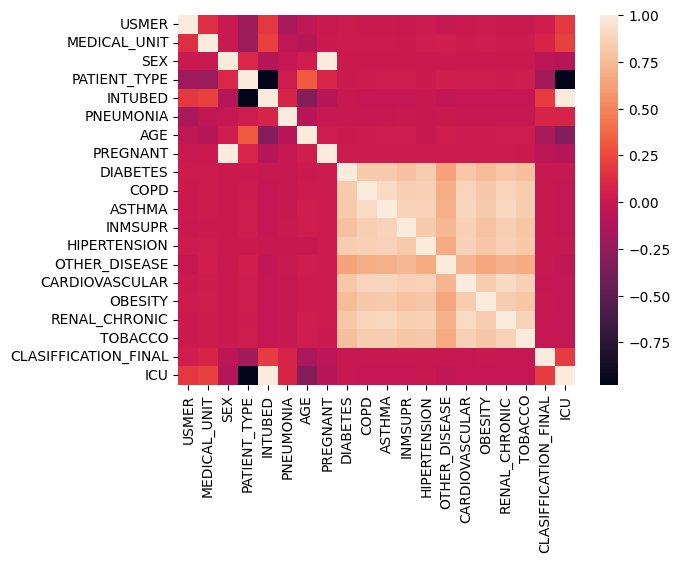

In [51]:
import seaborn as sns
sns.heatmap(data=df.drop(axis=1,columns='DATE_DIED').corr())

## Data Cleaning

We find the total number of missing values in each of the 21 features and corresponding percentage of missing value contributed by each of these features

In [52]:
df_reduced = df.copy()
df_reduced = df_reduced.replace([97, 98, 99], np.nan)
missing_counts = df_reduced.isnull().sum()
invalid_counts = df_reduced.isin([97, 98, 99]).sum()
total_missing_counts = missing_counts + invalid_counts
perc_missing_values = round(total_missing_counts / len(df) * 100, 2)
missing_df = pd.DataFrame({'Feature': df_reduced.columns, 'NaN_count': missing_counts, '97_98_99_count': invalid_counts, 'Total_missing_count': total_missing_counts, 'Percentage_missing': perc_missing_values})
missing_df = missing_df.sort_values(by='Percentage_missing', ascending=False)

print(missing_df)

                                   Feature  NaN_count  97_98_99_count  \
ICU                                    ICU     856032               0   
INTUBED                            INTUBED     855869               0   
PREGNANT                          PREGNANT     527265               0   
PNEUMONIA                        PNEUMONIA      16003               0   
OTHER_DISEASE                OTHER_DISEASE       5045               0   
INMSUPR                            INMSUPR       3404               0   
DIABETES                          DIABETES       3338               0   
TOBACCO                            TOBACCO       3220               0   
HIPERTENSION                  HIPERTENSION       3104               0   
RENAL_CHRONIC                RENAL_CHRONIC       3006               0   
OBESITY                            OBESITY       3032               0   
CARDIOVASCULAR              CARDIOVASCULAR       3076               0   
COPD                                  COPD       30

New copy of the original dataframe is created . We get the count of unique values present in each column 

In [53]:
df_copy = df.copy()
df_copy.shape

for i in df.columns:
 print(df[i].value_counts())
 print('\n')

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

### PREGNANT column cleaning

As Men cannot be PREGNANT, we convert all the 97(missing values) to 2(No) for all row values with SEX = 2(MALE) 

In [54]:
# replace all the missing values from PREGNANT column if Gender is MALE
print("in original dataset :\n",df_copy[(df_copy.SEX == 2)]['PREGNANT'].value_counts())

df_copy.loc[(df_copy.SEX == 2) & (df_copy.PREGNANT == 97), "PREGNANT"] = df_copy["PREGNANT"].replace(97, 2)

print("\n\nafter above step :\n",df_copy[(df_copy.SEX == 2)]['PREGNANT'].value_counts())

in original dataset :
 97    523511
Name: PREGNANT, dtype: int64


after above step :
 2    523511
Name: PREGNANT, dtype: int64


### CLASIFICATION_FINAL column cleaning

Consider the column CLASIFICATION_FINAL which describes if the patient is tested positive for Covid or was the test inconclusive.

For values >=4 i.e. 4,5,6,7 , the test is either negative or inconclusive, hence, we will replace it with 0("NO") 

For Values 1,2,3 the covid test is Positive, hence, we will replace it with 1("YES")

In [55]:
# Consider CLASSIFICATION column , replace all values >4 with 2("NO") since covid test is inconclusive 
print("\n\nas per original dataset :\n",df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 4), "CLASIFFICATION_FINAL"])

df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 4), "CLASIFFICATION_FINAL"] = df_copy["CLASIFFICATION_FINAL"].replace([4,5,6,7], 0)

print("Repacing 4,5,6,7 with 0 since covid test is inconclusive\n",df_copy['CLASIFFICATION_FINAL'].value_counts())

# Consider all values in [1,2,3] as tested positive for Covid-19 Virus
df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 1), "CLASIFFICATION_FINAL"] = df_copy["CLASIFFICATION_FINAL"].replace([1,2,3], 1)

print("Repacing 1,2,3 with 1 since covid test is Positive\n",df_copy['CLASIFFICATION_FINAL'].value_counts())



as per original dataset :
 1          5
3          7
42         5
43         5
44         5
          ..
1048570    7
1048571    7
1048572    7
1048573    7
1048574    7
Name: CLASIFFICATION_FINAL, Length: 656596, dtype: int64
Repacing 4,5,6,7 with 0 since covid test is inconclusive
 0    656596
3    381527
1      8601
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64
Repacing 1,2,3 with 1 since covid test is Positive
 0    656596
1    391979
Name: CLASIFFICATION_FINAL, dtype: int64


### Basic Feature Selection

We filter out the columns which do not give us useful information 

MEDICAL_UNIT - no useful info can be got since it is not known what the enumerations {1, 2, ... 12, 13} mean.

ICU  and INTUBATED - Too many missing values.

In [56]:
Filtered_Cols=['USMER', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL','PREGNANT']

df_reduced=df_copy[Filtered_Cols].copy()

In [57]:
# The shape of data frame after considering the filled values from different columns
original_number_of_datapoints = df.shape
df_reduced = df_reduced.replace([97, 98, 99], np.nan)
df_reduced=df_reduced.dropna(axis=0)
print(df_reduced.head(),"\nreduced size after data cleaning: ",df_reduced.shape,
      "\noriginal size : ",original_number_of_datapoints)

   USMER  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA   AGE  DIABETES  COPD  \
0      2    1             1  03/05/2020        1.0  65.0       2.0   2.0   
1      2    2             1  03/06/2020        1.0  72.0       2.0   2.0   
2      2    2             2  09/06/2020        2.0  55.0       1.0   2.0   
3      2    1             1  12/06/2020        2.0  53.0       2.0   2.0   
4      2    2             1  21/06/2020        2.0  68.0       1.0   2.0   

   ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
0     2.0      2.0           1.0            2.0             2.0      2.0   
1     2.0      2.0           1.0            2.0             2.0      1.0   
2     2.0      2.0           2.0            2.0             2.0      2.0   
3     2.0      2.0           2.0            2.0             2.0      2.0   
4     2.0      2.0           1.0            2.0             2.0      2.0   

   RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  PREGNANT  
0            2.0      2.0 

### Target Cleaning

In [58]:
# "In data set 9999-99-99 indicates person is not died, so replacing these values with 0. Persons who really died has values 03-03-2020 format. So replacing data format values with 1. So 0 means died, 1 means not died in DATE_DIED column

df_reduced["DATE_DIED"] = [0 if each=="9999-99-99" else 1 for each in df_reduced.DATE_DIED]

In [59]:
for i in df_reduced.columns:
 print(df_reduced[i].value_counts())
 print('\n')

2    655933
1    365722
Name: USMER, dtype: int64


2    511795
1    509860
Name: SEX, dtype: int64


1    830233
2    191422
Name: PATIENT_TYPE, dtype: int64


0    947100
1     74555
Name: DATE_DIED, dtype: int64


2.0    884402
1.0    137253
Name: PNEUMONIA, dtype: int64


30.0     26456
31.0     25419
28.0     24735
29.0     24595
34.0     24406
         ...  
115.0        2
119.0        2
111.0        1
121.0        1
113.0        1
Name: AGE, Length: 118, dtype: int64


2.0    899531
1.0    122124
Name: DIABETES, dtype: int64


2.0    1007356
1.0      14299
Name: COPD, dtype: int64


2.0    991243
1.0     30412
Name: ASTHMA, dtype: int64


2.0    1008105
1.0      13550
Name: INMSUPR, dtype: int64


2.0    862521
1.0    159134
Name: HIPERTENSION, dtype: int64


2.0    994597
1.0     27058
Name: OTHER_DISEASE, dtype: int64


2.0    1001613
1.0      20042
Name: CARDIOVASCULAR, dtype: int64


2.0    865081
1.0    156574
Name: OBESITY, dtype: int64


2.0    1003350
1.0      18305
Name

In [60]:
num_died = (df_reduced['DATE_DIED'] == 1).sum()
num_not_died = (df_reduced['DATE_DIED'] == 0).sum()
perc_died = num_died / len(df_reduced) * 100
perc_not_died = num_not_died / len(df_reduced) * 100

# Print the results
print("Number of people who died:", num_died)
print("Number of people who did not die:", num_not_died)
print("Percentage of people who died:", perc_died, "%")
print("Percentage of people who did not die:", perc_not_died, "%")

Number of people who died: 74555
Number of people who did not die: 947100
Percentage of people who died: 7.2974732174755665 %
Percentage of people who did not die: 92.70252678252443 %


### PATIENT_TYPE Column cleaning

Consider the column 'PATIENT_TYPE' . 

It describes whether the patient returned home (1) or hosptialized (2) 
we will change the feature name to Hospitalized and have Yes as 1 No as 0

In [61]:
print("\n\nas per reduced dataset number of samples with patient type 1 and 2 :" , df_reduced["PATIENT_TYPE"].value_counts())

df_reduced.loc[(df_reduced.PATIENT_TYPE == 1), "PATIENT_TYPE"] = df_reduced["PATIENT_TYPE"].replace(1, 0)
df_reduced.loc[(df_reduced.PATIENT_TYPE == 2), "PATIENT_TYPE"] = df_reduced["PATIENT_TYPE"].replace(2, 1)

print("\n\nafter above steps, number of samples with patient type 1 and 2 :" , df_reduced["PATIENT_TYPE"].value_counts())



as per reduced dataset number of samples with patient type 1 and 2 : 1    830233
2    191422
Name: PATIENT_TYPE, dtype: int64


after above steps, number of samples with patient type 1 and 2 : 0    830233
1    191422
Name: PATIENT_TYPE, dtype: int64


### Convert to Binary Feature Vectors

Convert all 2(No) and 1(Yes) Values to binary  0(No) and 1(Yes)

In [62]:
df_final = df_reduced.copy()
for col in df_final.columns:
  df_final = df_final.replace(2,0)

df_final = df_final.astype(int)
df_final

,USMER,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,PREGNANT
0,0,1,0,1,1,65,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,1,72,0,0,0,0,1,0,0,1,1,0,0,0
2,0,0,1,1,0,55,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,53,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,68,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0
1048571,1,0,1,0,0,51,0,0,0,0,1,0,0,0,0,0,0,0
1048572,0,0,0,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0
1048573,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0


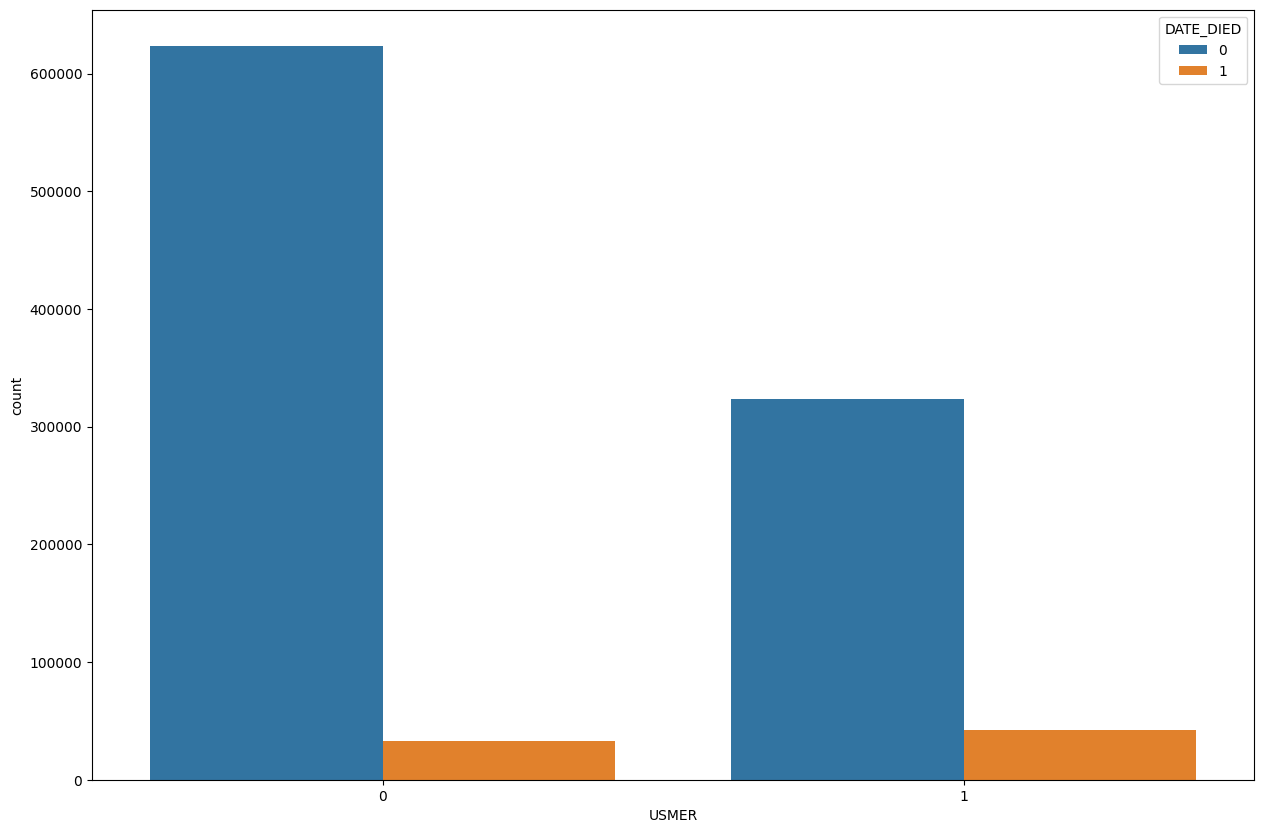

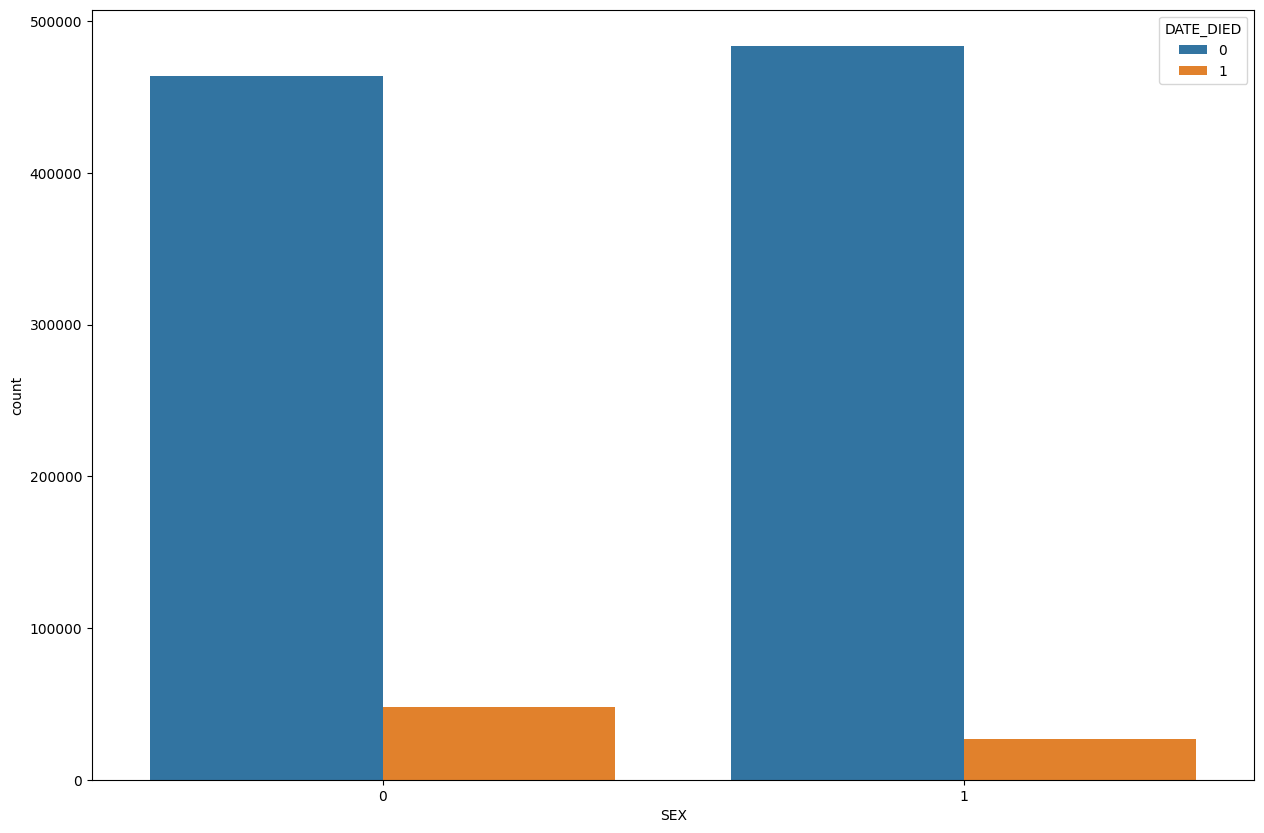

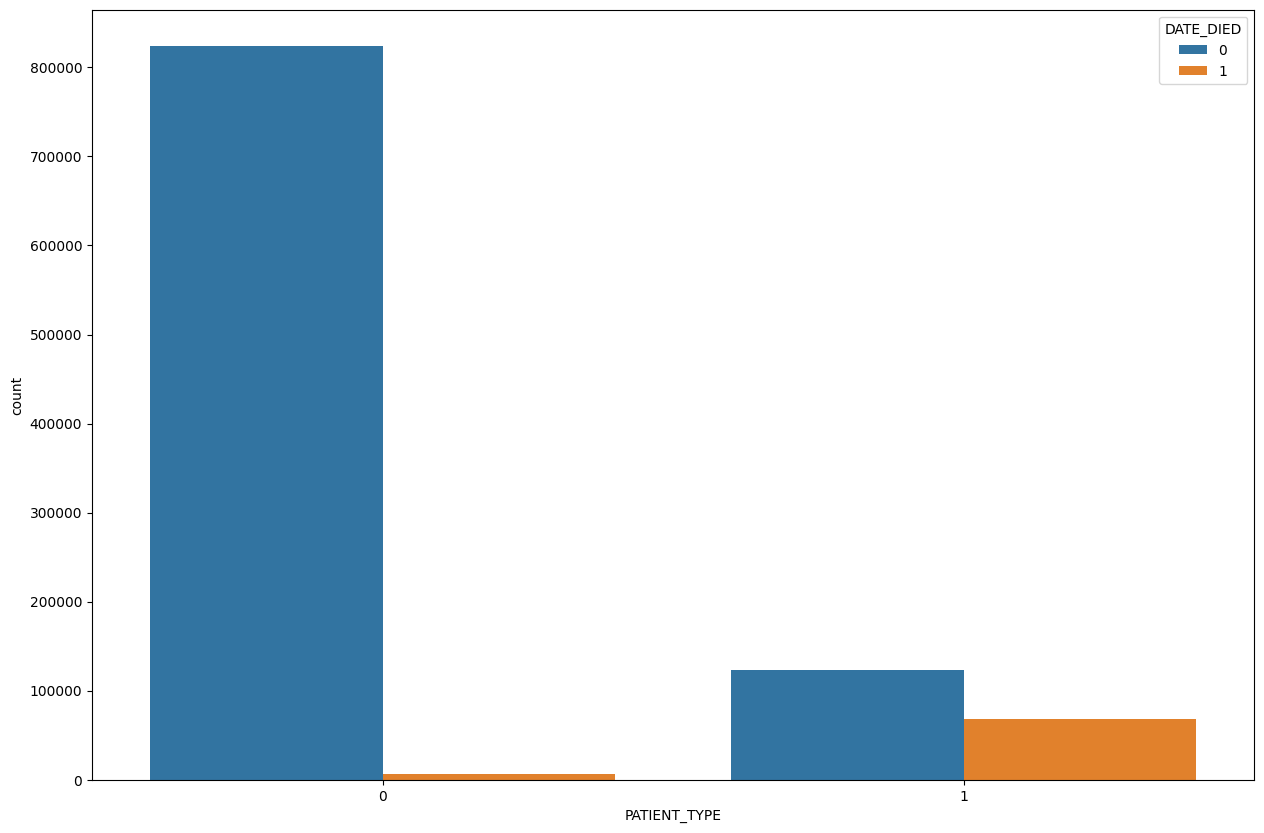

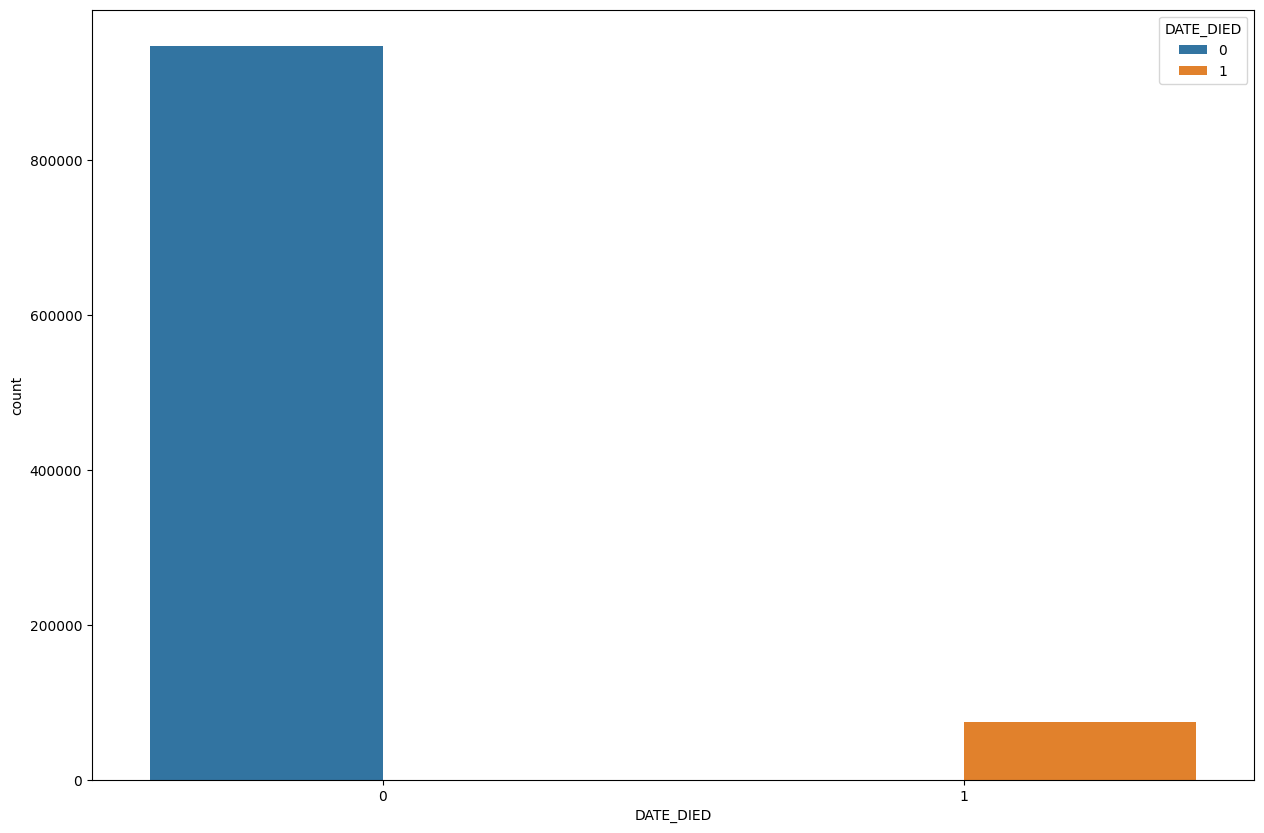

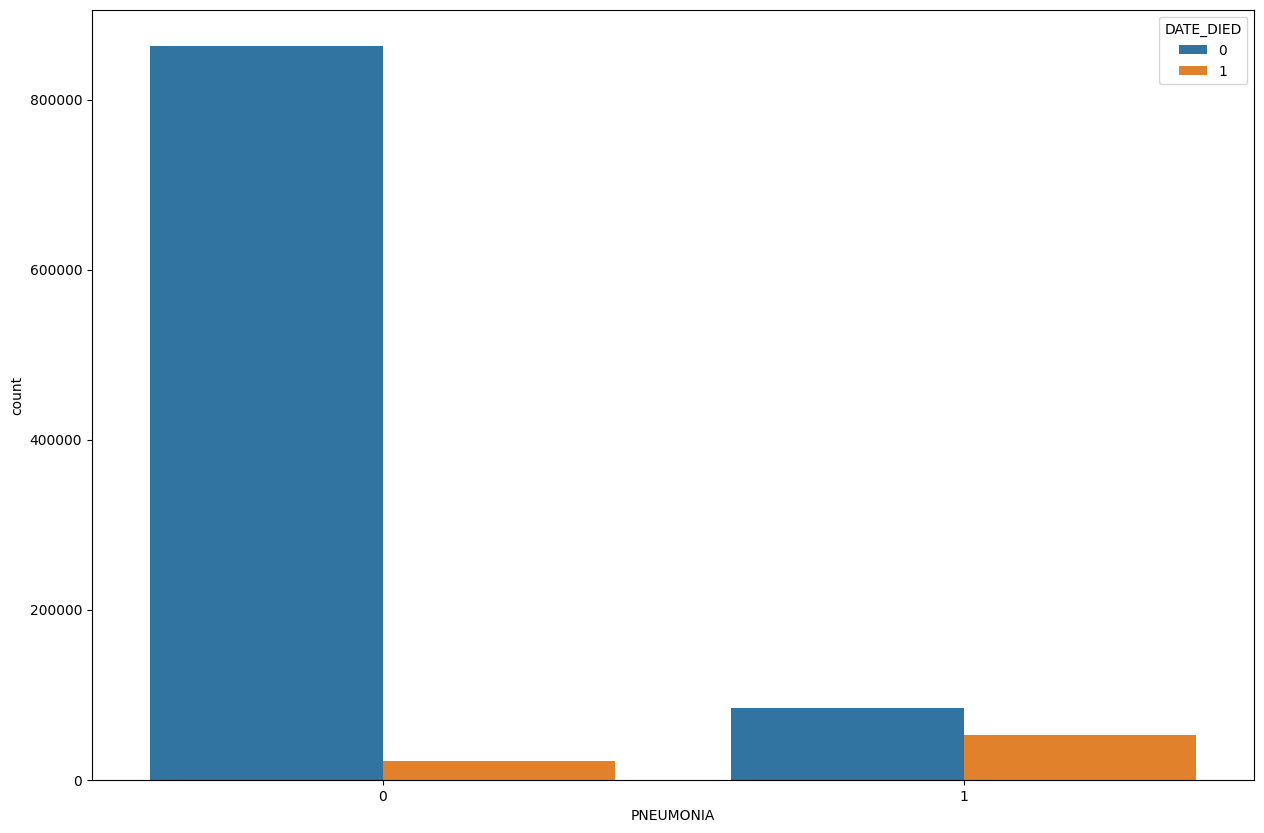

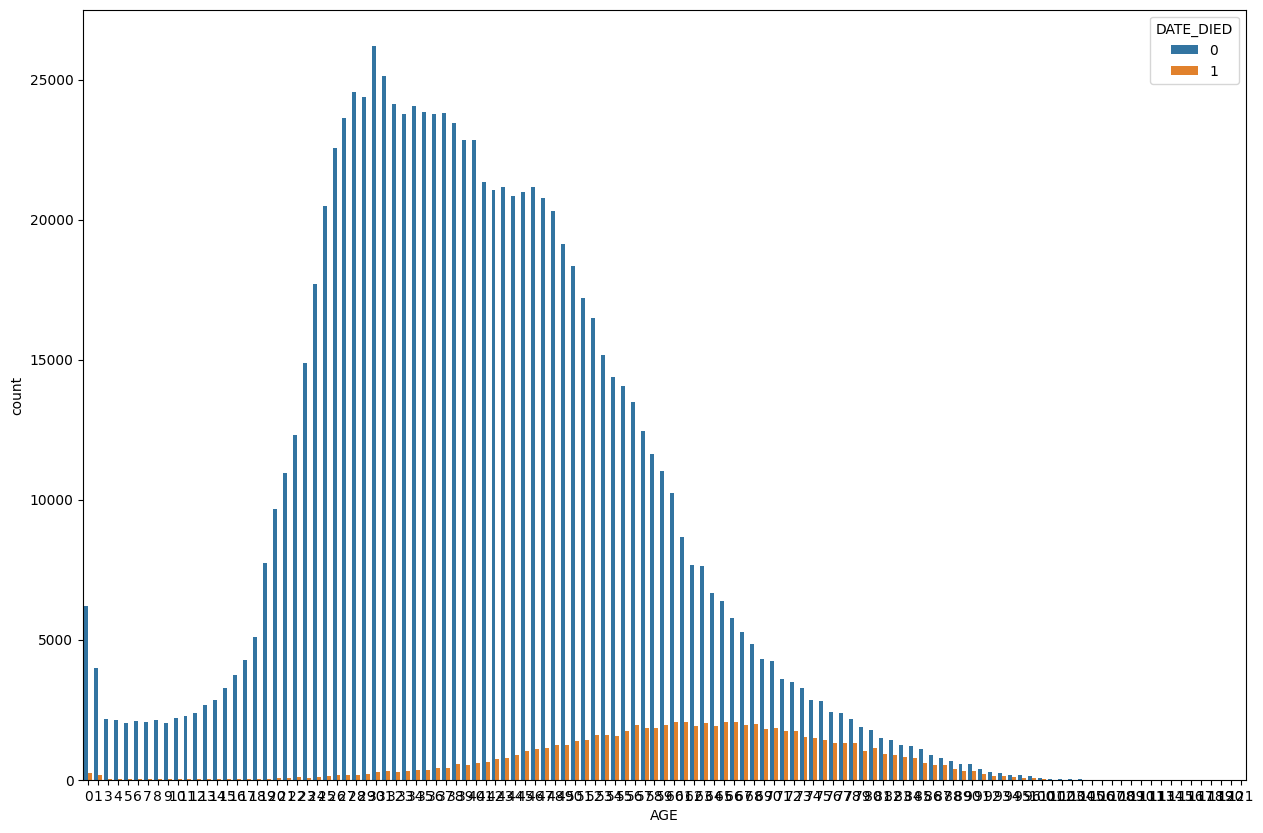

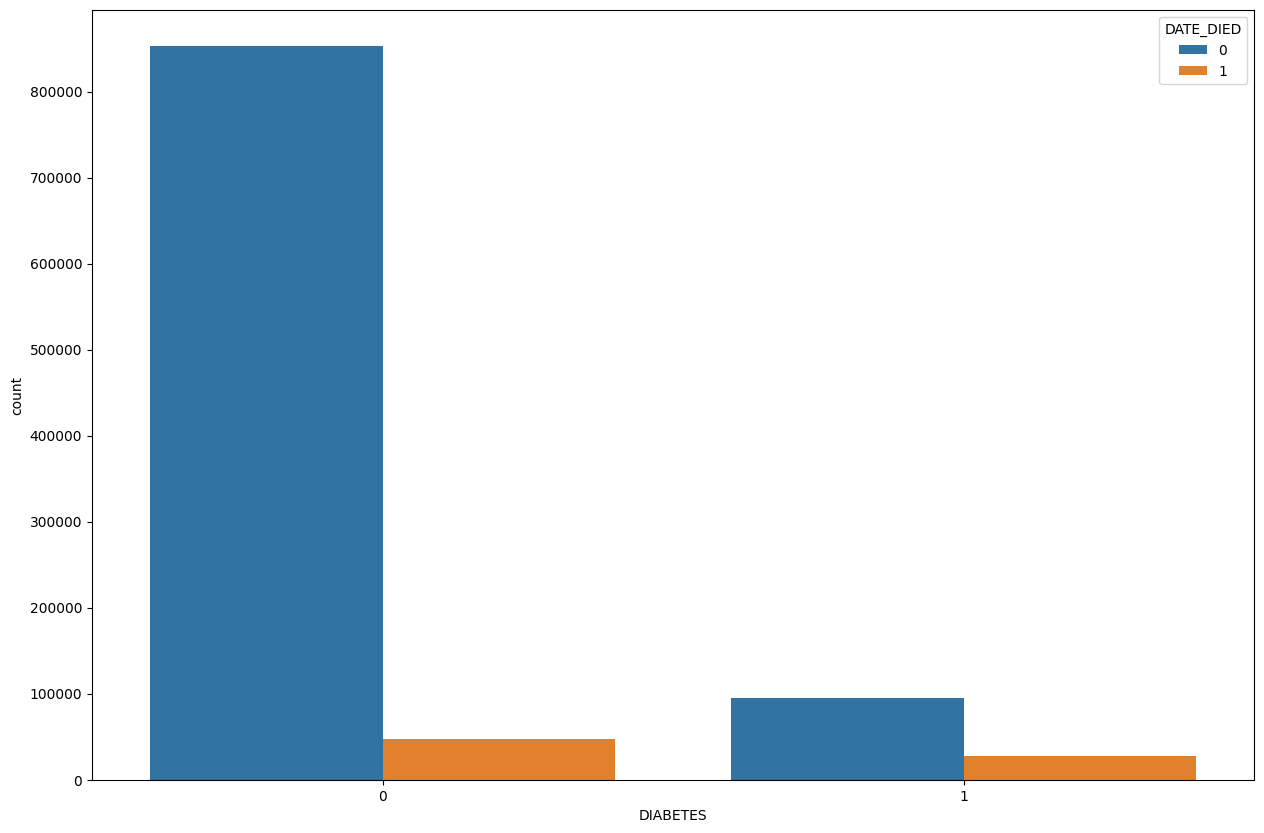

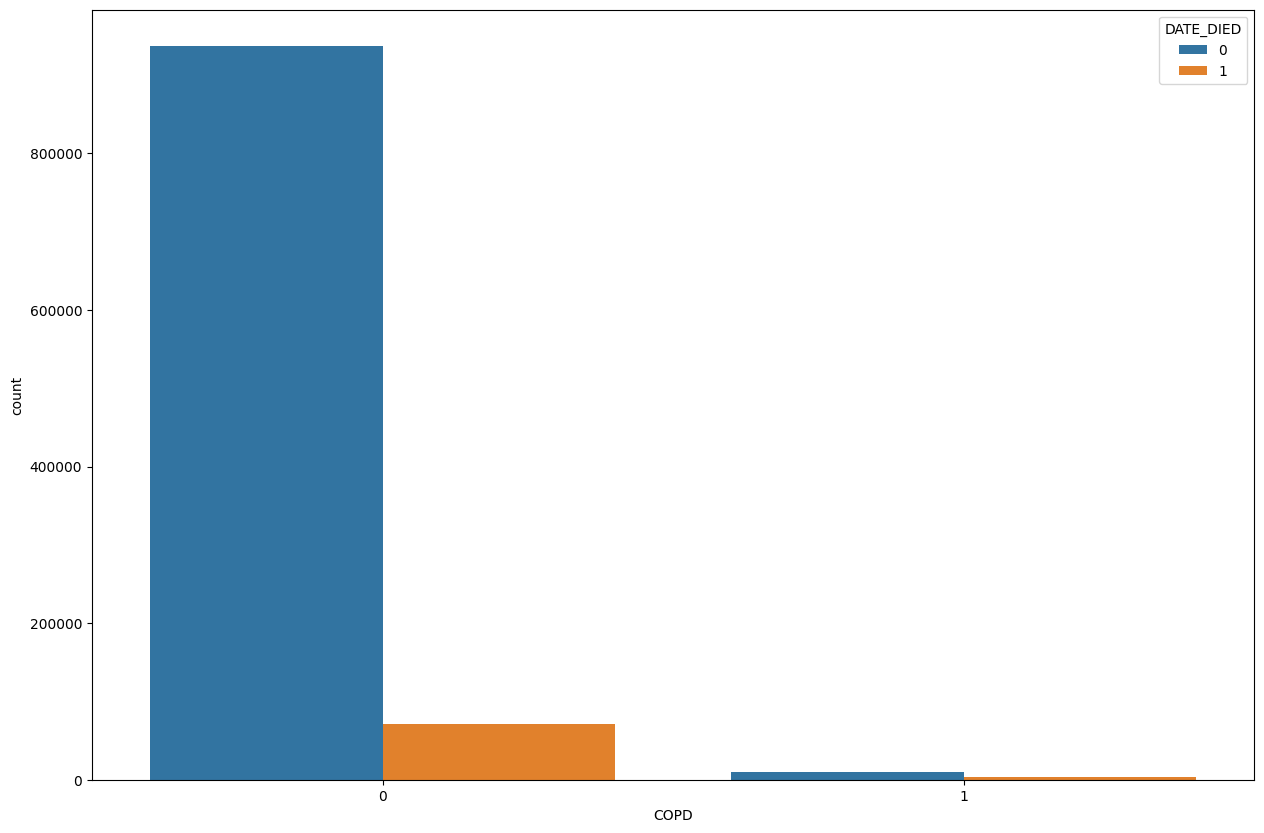

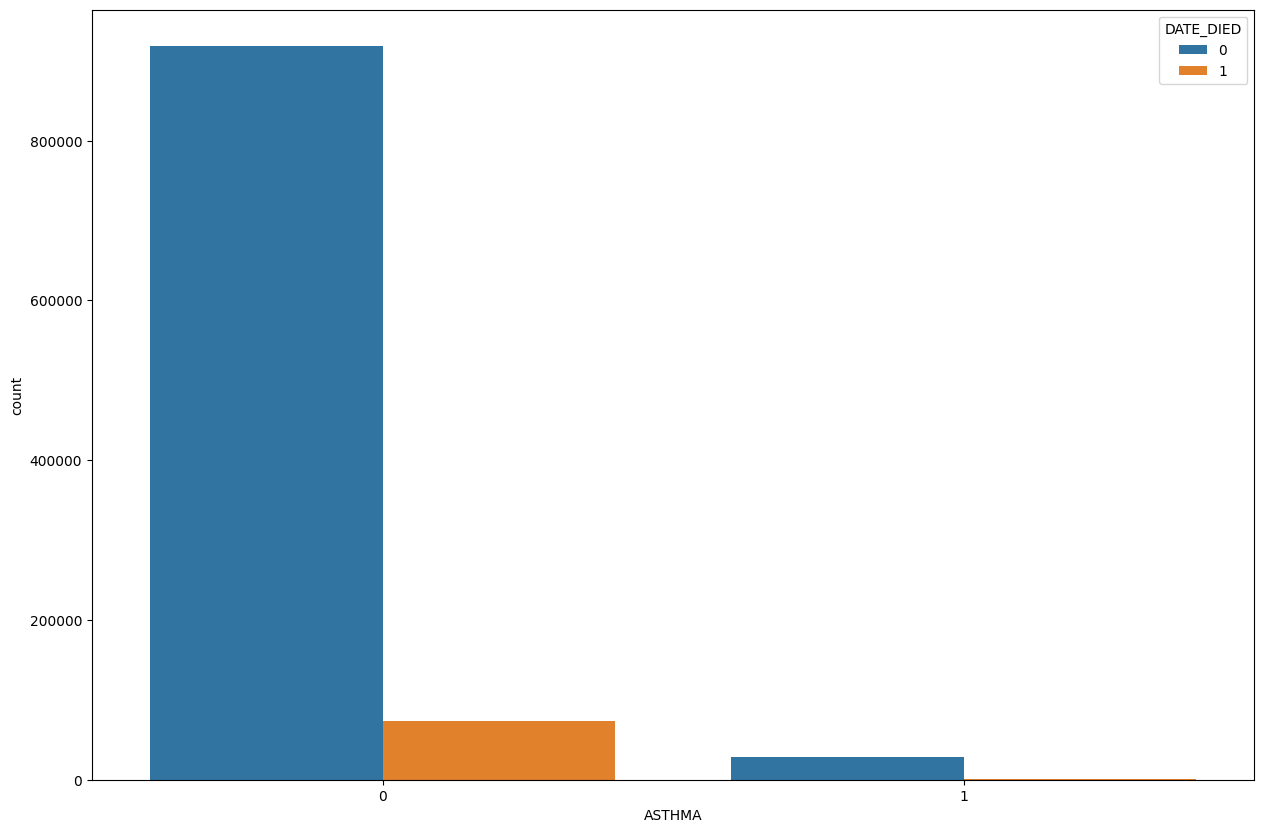

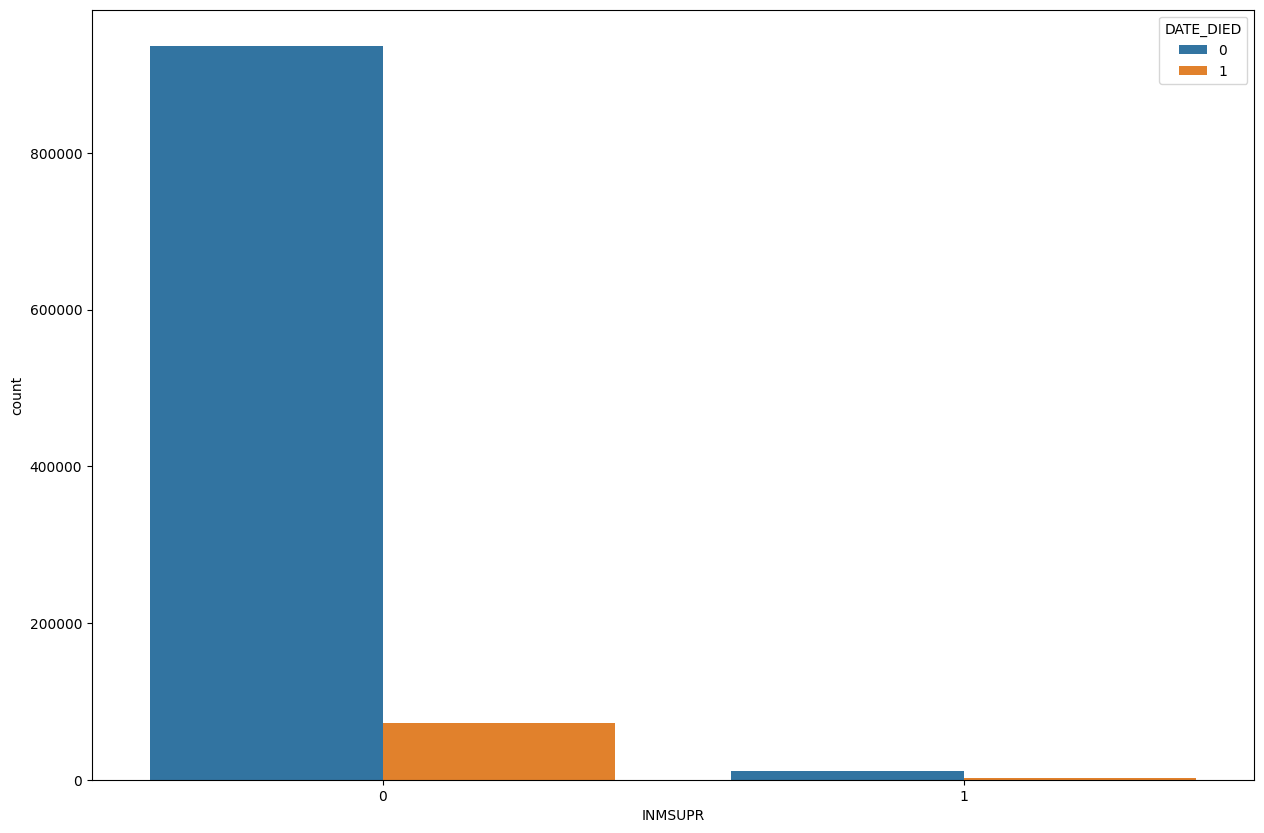

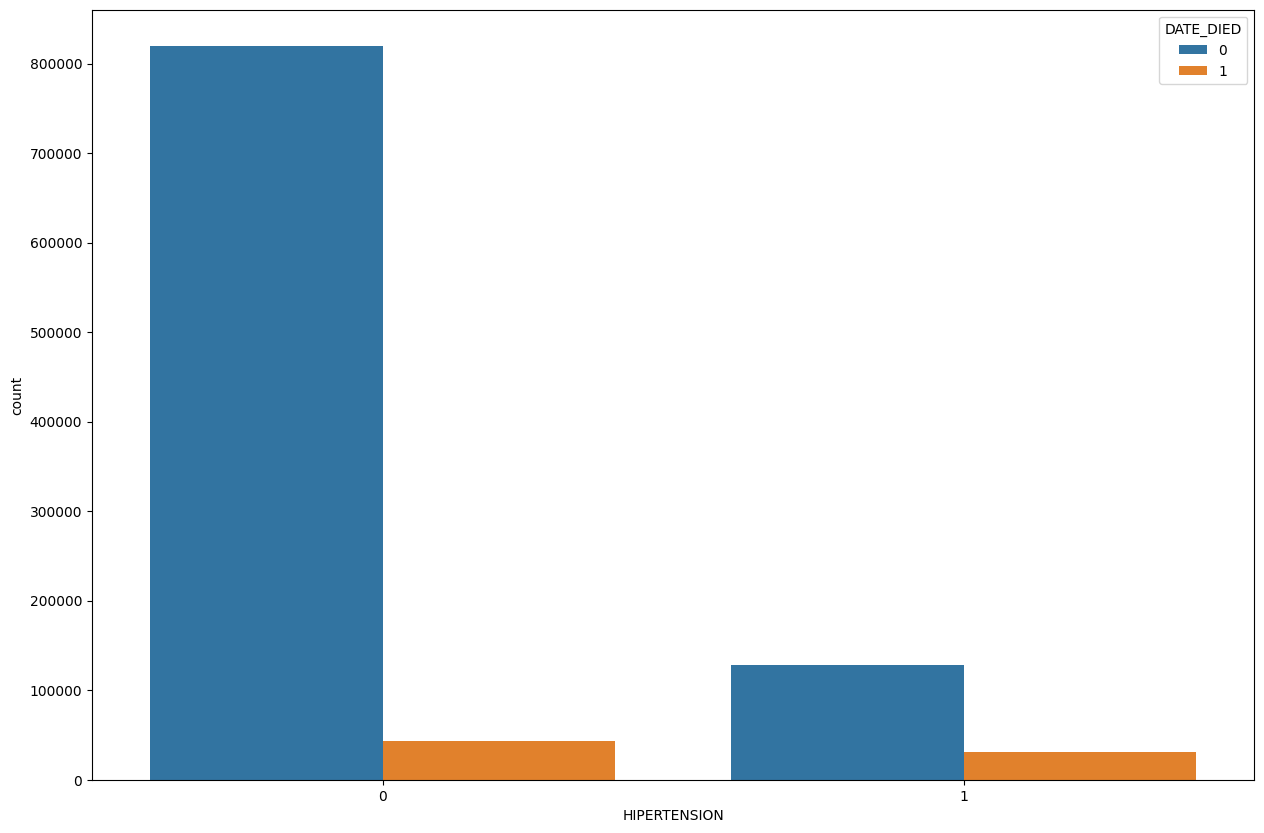

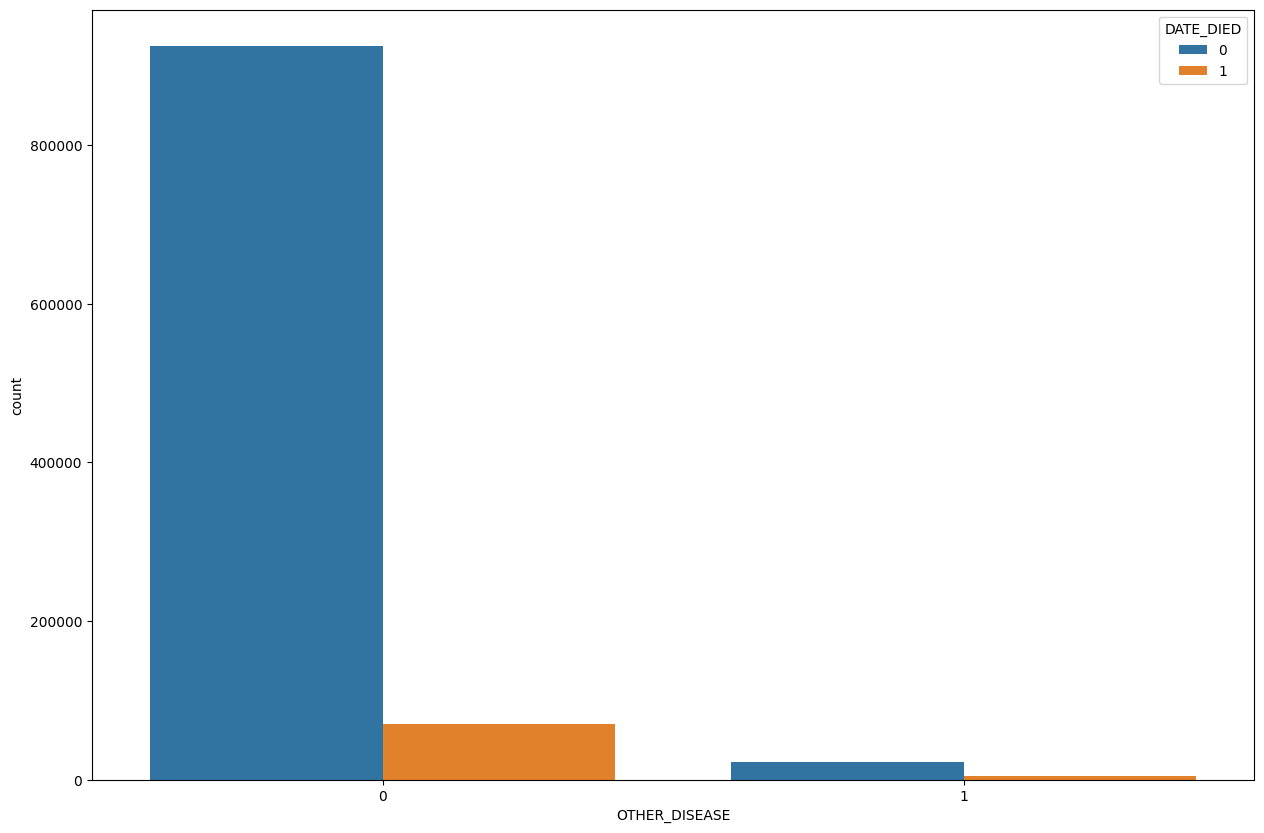

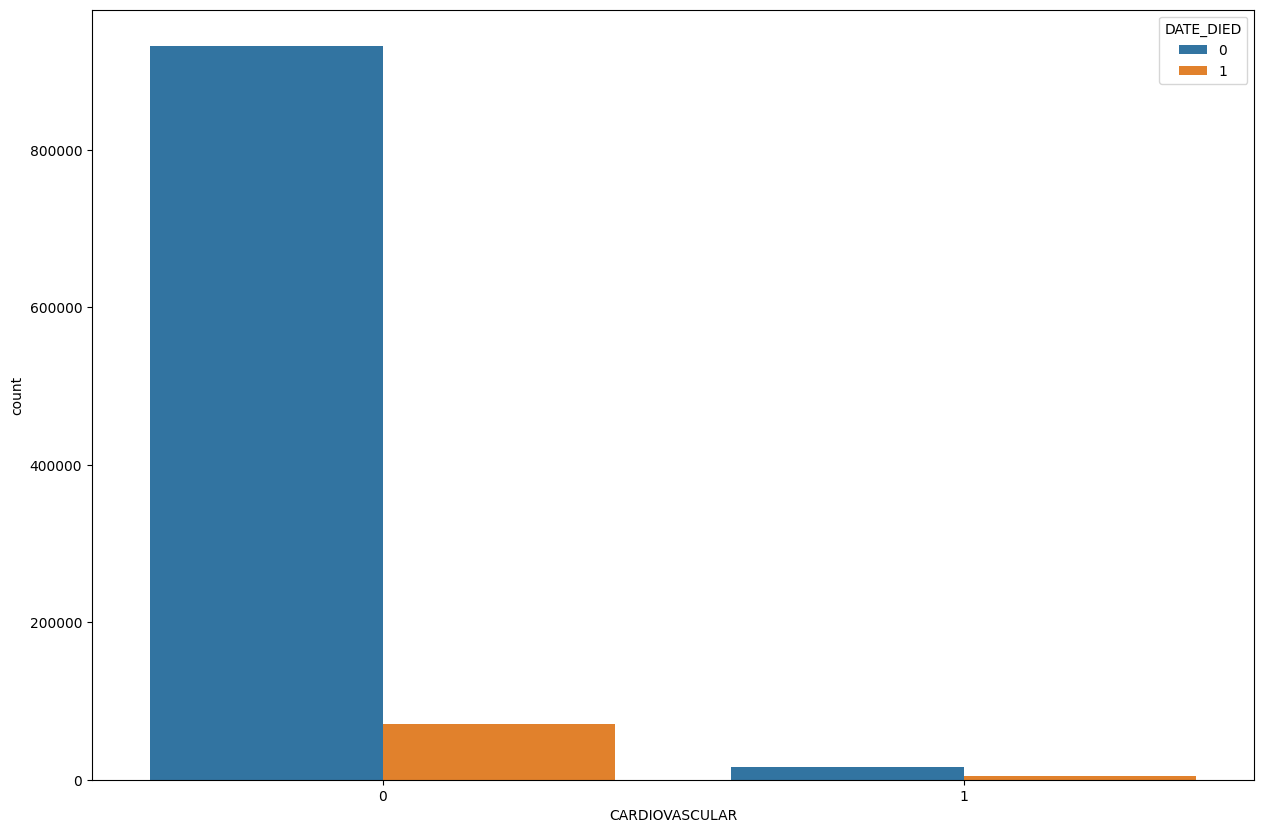

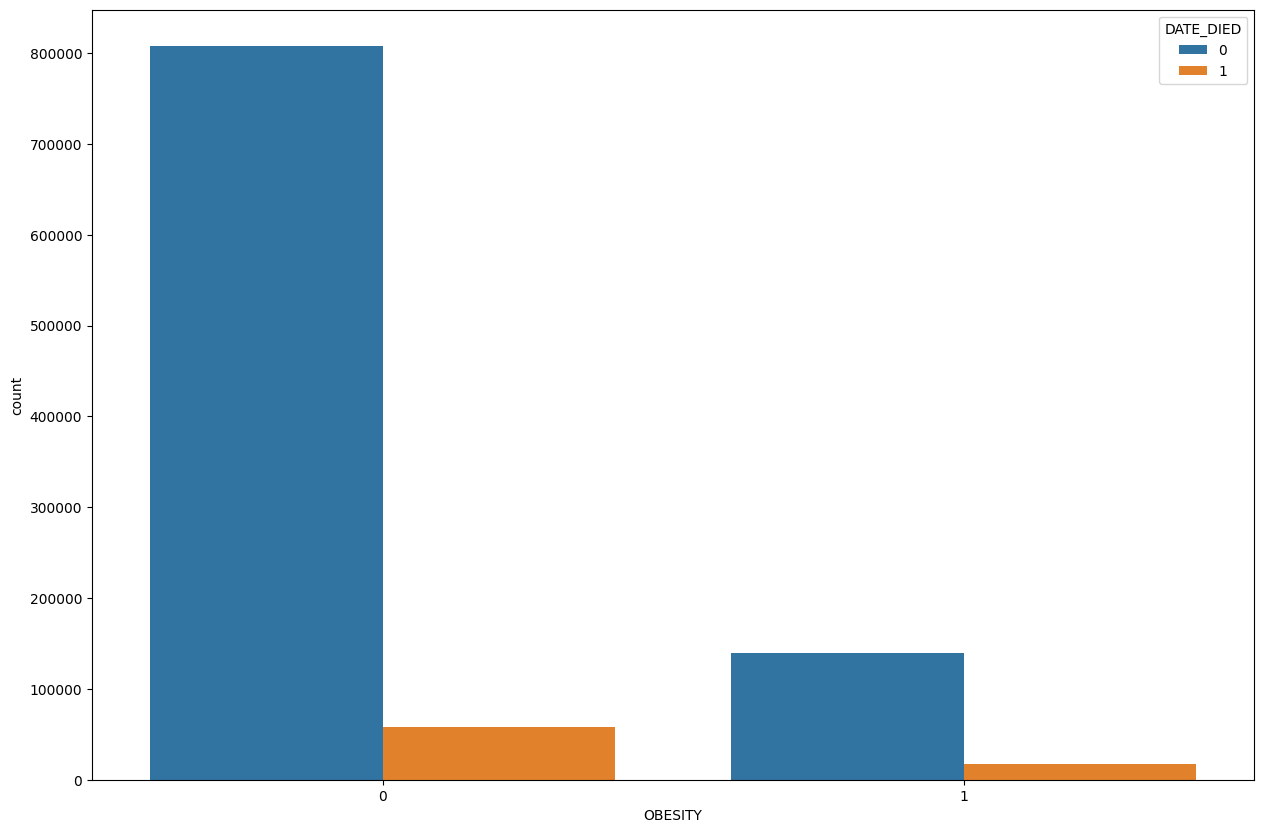

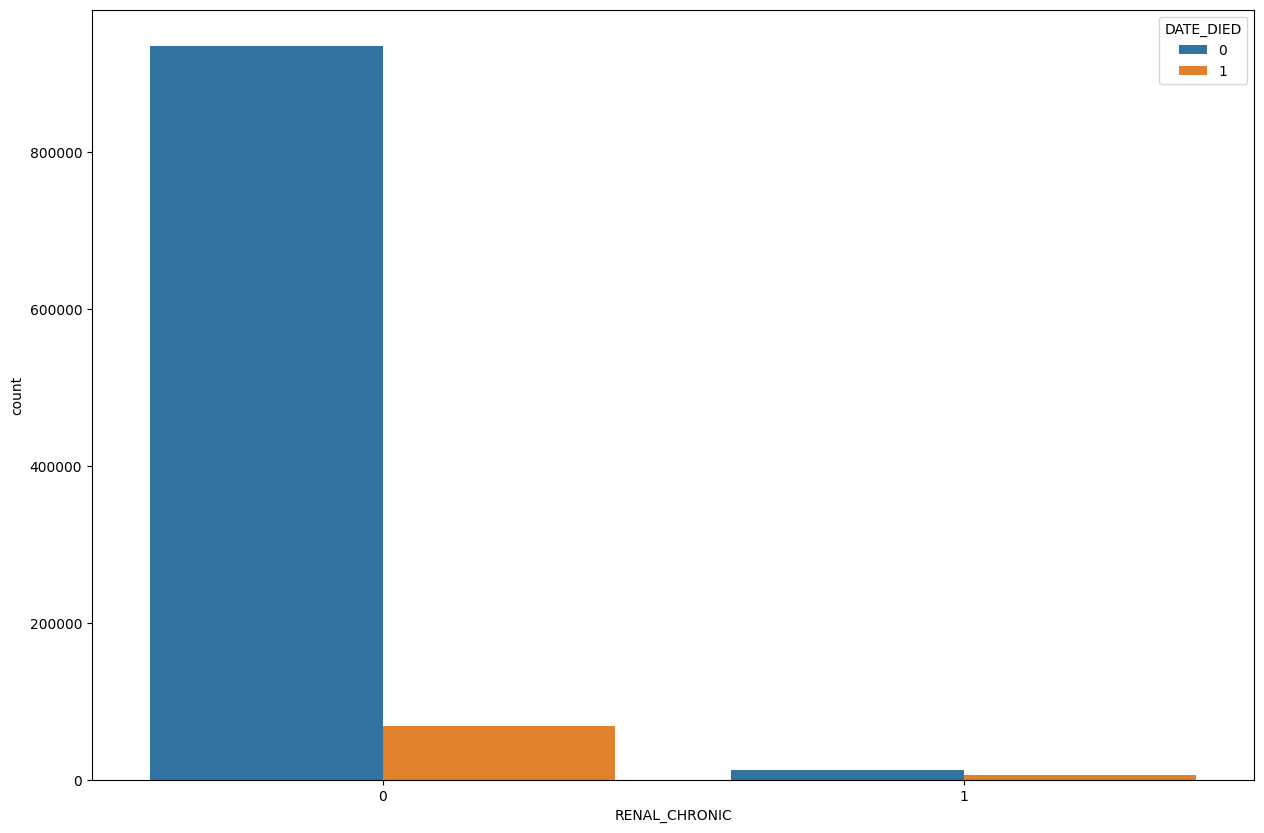

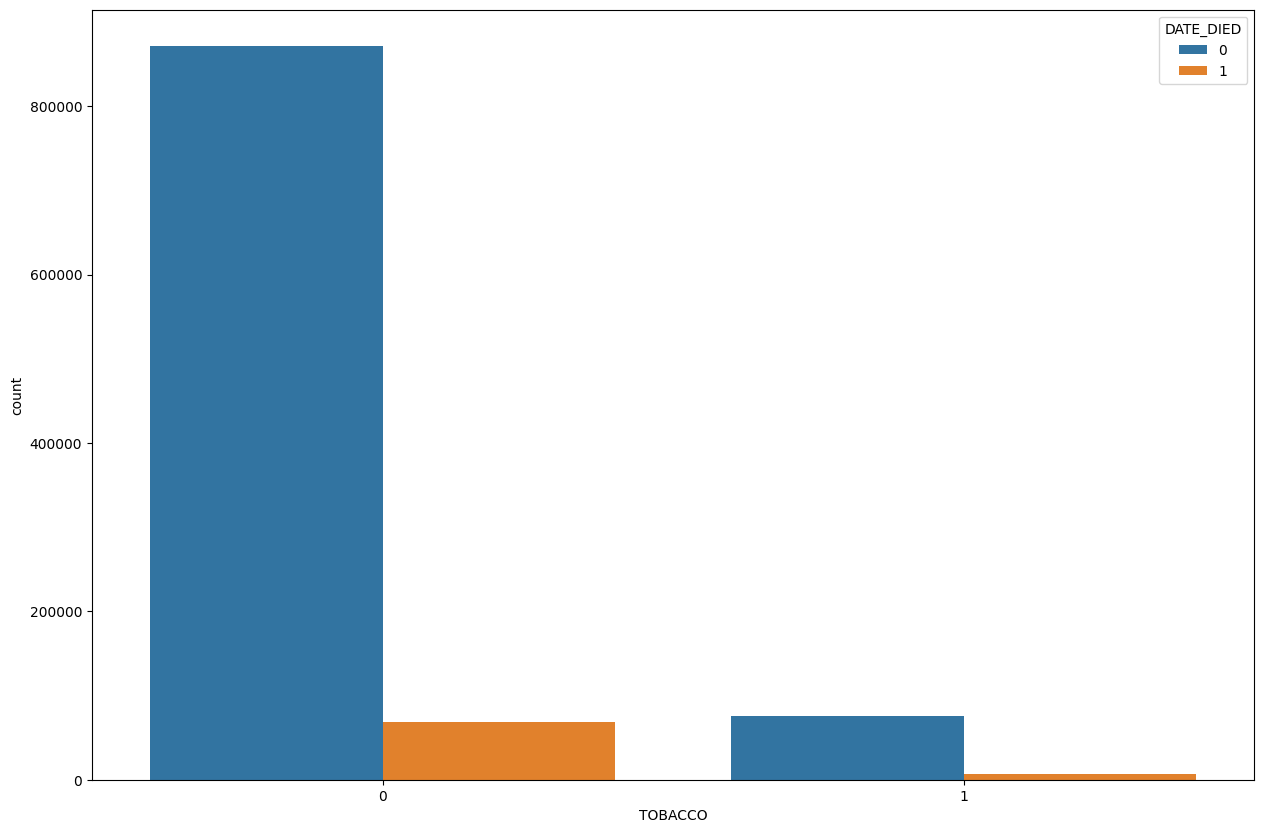

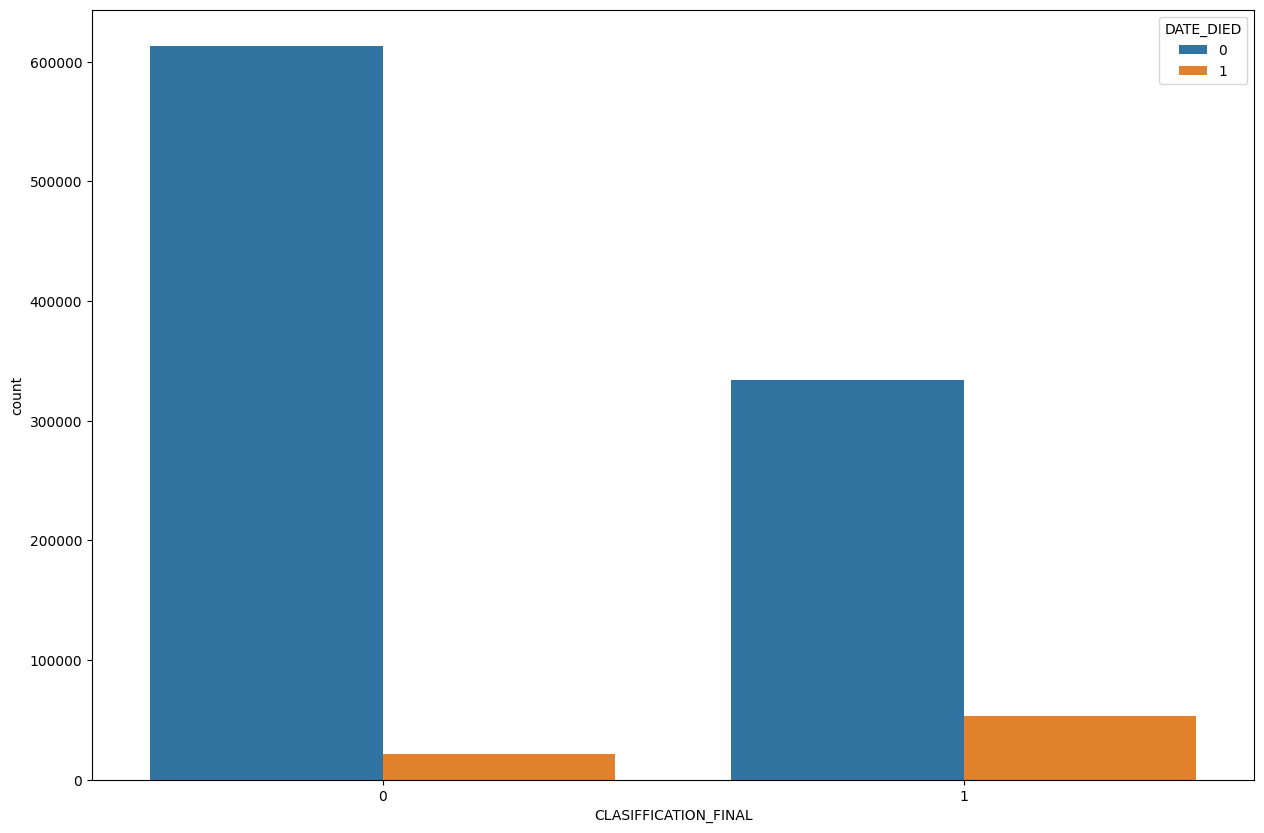

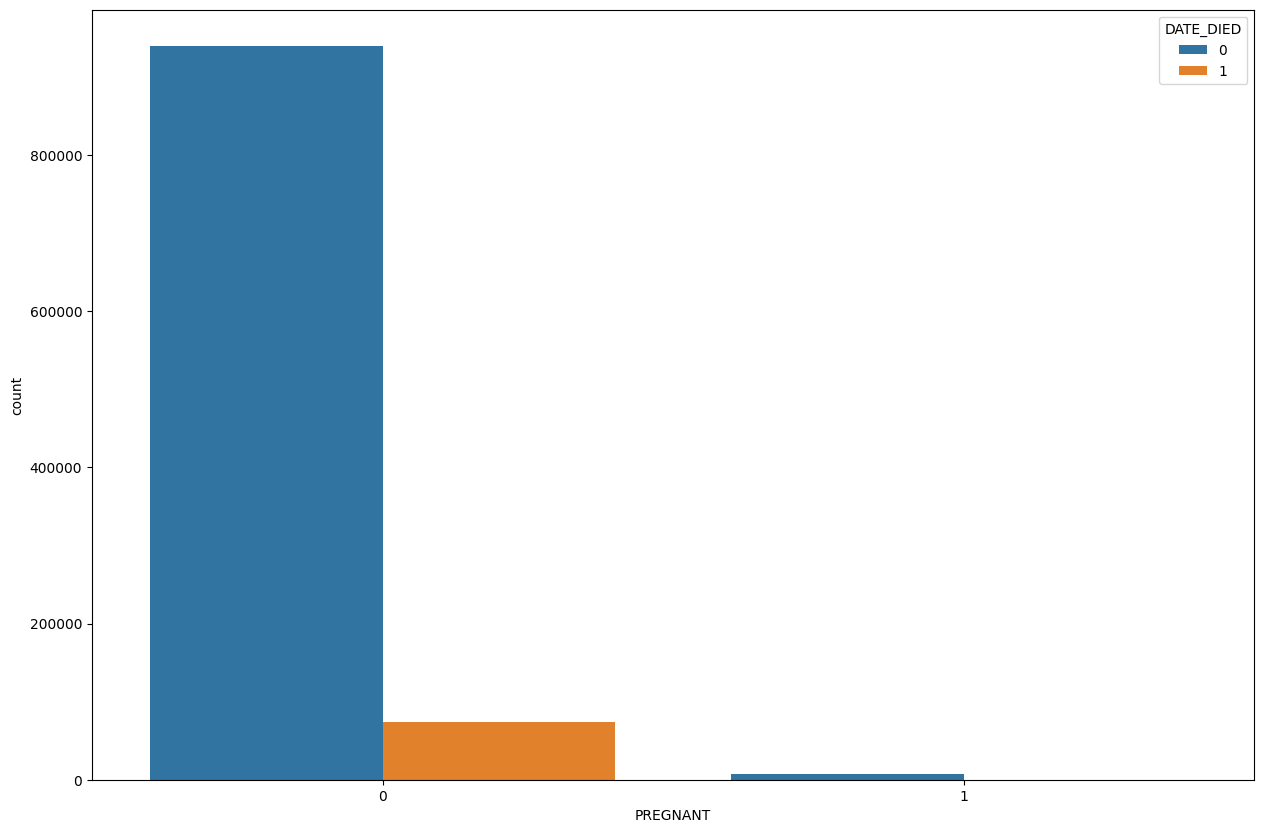

In [63]:
for col in df_final.columns:
 plt.figure(figsize=(15,10))
 sns.countplot(x=df_final[col],hue=df_final["DATE_DIED"])

In [64]:
for i in df_final.columns:
 print(df_final[i].value_counts())
 print('\n')

0    655933
1    365722
Name: USMER, dtype: int64


0    511795
1    509860
Name: SEX, dtype: int64


0    830233
1    191422
Name: PATIENT_TYPE, dtype: int64


0    947100
1     74555
Name: DATE_DIED, dtype: int64


0    884402
1    137253
Name: PNEUMONIA, dtype: int64


30     26456
31     25419
28     24735
29     24595
34     24406
       ...  
115        2
119        2
111        1
121        1
113        1
Name: AGE, Length: 117, dtype: int64


0    899531
1    122124
Name: DIABETES, dtype: int64


0    1007356
1      14299
Name: COPD, dtype: int64


0    991243
1     30412
Name: ASTHMA, dtype: int64


0    1008105
1      13550
Name: INMSUPR, dtype: int64


0    862521
1    159134
Name: HIPERTENSION, dtype: int64


0    994597
1     27058
Name: OTHER_DISEASE, dtype: int64


0    1001613
1      20042
Name: CARDIOVASCULAR, dtype: int64


0    865081
1    156574
Name: OBESITY, dtype: int64


0    1003350
1      18305
Name: RENAL_CHRONIC, dtype: int64


0    939141
1     82514
Name: 

### Applying one hot encoding to AGE and SEX Columns



In [65]:
age_bins = [0, 20, 40, 60, 80, 100, 120]
age_labels = ['0-20', '20-40', '40-60', '60-80','80-100','100-120']
df_final['AGE_GROUP'] = pd.cut(df_final['AGE'], bins=age_bins, labels=age_labels)

# Apply one hot encoding using pd.get_dummies()
one_hot_encoded = pd.get_dummies(df_final['AGE_GROUP'], prefix='AGE')

# Concatenate the original dataframe with the one hot encoded dataframe
df_final = pd.concat([df_final, one_hot_encoded], axis=1)

# Drop the original "AGE" and "AGE_GROUP" columns
df_final.drop(['AGE', 'AGE_GROUP'], axis=1, inplace=True)

gender_one_hot = pd.get_dummies(df_final['SEX'], prefix='GENDER', prefix_sep='')
df_final = pd.concat([df_final, gender_one_hot], axis=1)
df_final.drop(['SEX'], axis=1, inplace=True)

df_final = df_final.rename(columns={'PATIENT_TYPE':'HOSPITALIZED', 'DATE_DIED':'DEATH','CLASIFFICATION_FINAL':'COVID-TEST','GENDER0':'MALE','GENDER1':'FEMALE'})


In [66]:
df_final.head()

,USMER,HOSPITALIZED,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,...,COVID-TEST,PREGNANT,AGE_0-20,AGE_20-40,AGE_40-60,AGE_60-80,AGE_80-100,AGE_100-120,MALE,FEMALE
0,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [67]:
for i in df_final.columns:
 print(df_final[i].value_counts())
 print('\n')

0    655933
1    365722
Name: USMER, dtype: int64


0    830233
1    191422
Name: HOSPITALIZED, dtype: int64


0    947100
1     74555
Name: DEATH, dtype: int64


0    884402
1    137253
Name: PNEUMONIA, dtype: int64


0    899531
1    122124
Name: DIABETES, dtype: int64


0    1007356
1      14299
Name: COPD, dtype: int64


0    991243
1     30412
Name: ASTHMA, dtype: int64


0    1008105
1      13550
Name: INMSUPR, dtype: int64


0    862521
1    159134
Name: HIPERTENSION, dtype: int64


0    994597
1     27058
Name: OTHER_DISEASE, dtype: int64


0    1001613
1      20042
Name: CARDIOVASCULAR, dtype: int64


0    865081
1    156574
Name: OBESITY, dtype: int64


0    1003350
1      18305
Name: RENAL_CHRONIC, dtype: int64


0    939141
1     82514
Name: TOBACCO, dtype: int64


0    634185
1    387470
Name: COVID-TEST, dtype: int64


0    1013814
1       7841
Name: PREGNANT, dtype: int64


0    956305
1     65350
Name: AGE_0-20, dtype: int64


0    580748
1    440907
Name: AGE_20-40, dt

<Axes: >

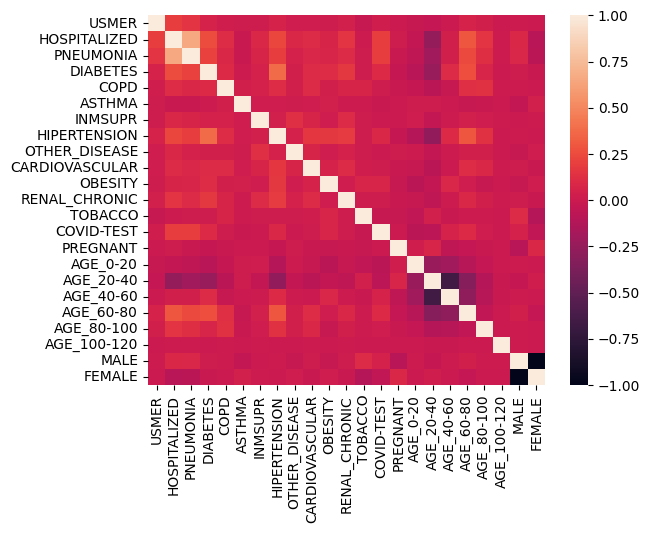

In [68]:
sns.heatmap(data=df_final.drop(axis=1,columns='DEATH').corr())

<Axes: >

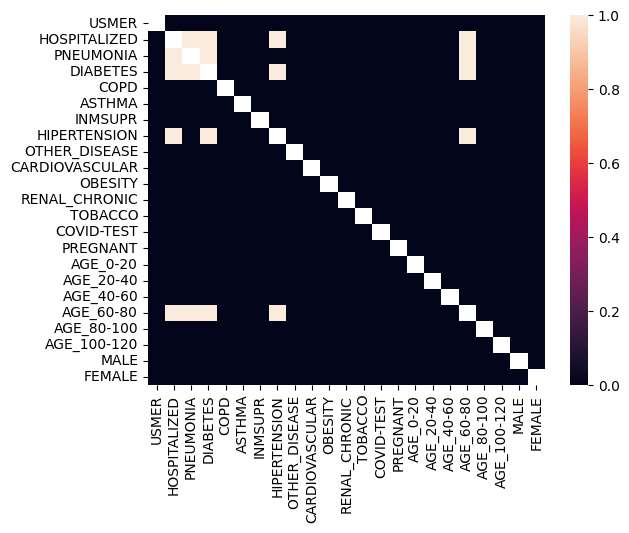

In [69]:
corr_matrix = df_final.drop(axis=1,columns='DEATH').corr() > 0.2
mask = np.eye(len(corr_matrix))
sns.heatmap(data=corr_matrix, mask= mask)

# Data Preparation for Model training

In [70]:
# get 3 sets of data - train , val , test

X = df_final.drop("DEATH", axis=1)
y = df_final["DEATH"]

# this split gives 2 sets for training and final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, X_test.shape)

(766241, 23) (255414, 23)


In [71]:
y_train.value_counts(), y_test.value_counts()

(0    710429
 1     55812
 Name: DEATH, dtype: int64,
 0    236671
 1     18743
 Name: DEATH, dtype: int64)

Henceforth , we will only use X_train for hyperparameter tuning.
X_test will be reserved only for validating the performance metrics on the final models.

## Feature Extraction 

# Using Decision Trees to get the best Features

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# X is the binary feature matrix, y is the target variable
clf = DecisionTreeClassifier(max_depth=120, random_state=0)
clf.fit(X_train, y_train)
importances = clf.feature_importances_


In [73]:
important_features = dict(zip(X_train.columns,importances))
important_features = dict(sorted(important_features.items(), key=lambda x: x[1], reverse=True))
print(important_features)

{'HOSPITALIZED': 0.6243465588317029, 'AGE_60-80': 0.07883092098333423, 'PNEUMONIA': 0.058983896210383, 'COVID-TEST': 0.05614799902325146, 'AGE_80-100': 0.03073934290366719, 'AGE_40-60': 0.02667690634369276, 'HIPERTENSION': 0.014096397739831625, 'DIABETES': 0.011548605112116668, 'OBESITY': 0.011464304208025635, 'USMER': 0.010927889925286812, 'TOBACCO': 0.010558773964875203, 'CARDIOVASCULAR': 0.010393992360591261, 'INMSUPR': 0.009900225556395898, 'OTHER_DISEASE': 0.0097104860550291, 'RENAL_CHRONIC': 0.009646690706836145, 'COPD': 0.0075924666894500266, 'ASTHMA': 0.006471631639529226, 'MALE': 0.005973973023733887, 'FEMALE': 0.0035080824131647407, 'AGE_20-40': 0.001291567117664477, 'AGE_0-20': 0.0005875944832385946, 'PREGNANT': 0.0004355473090014765, 'AGE_100-120': 0.00016614739919790564}


In [74]:
np.cumsum(list(important_features.values()))

array([0.62434656, 0.70317748, 0.76216138, 0.81830938, 0.84904872,
       0.87572562, 0.88982202, 0.90137063, 0.91283493, 0.92376282,
       0.9343216 , 0.94471559, 0.95461581, 0.9643263 , 0.97397299,
       0.98156546, 0.98803709, 0.99401106, 0.99751914, 0.99881071,
       0.99939831, 0.99983385, 1.        ])

Text(0, 0.5, 'Importance of cumulative features')

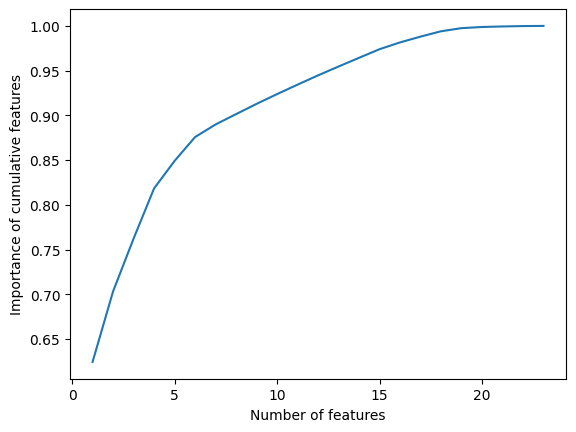

In [75]:
plt.plot(range(1, len(X_train.columns)+1), np.cumsum(list(important_features.values())))
plt.xlabel("Number of features")
plt.ylabel("Importance of cumulative features")

Choose best k features such that importance adds up to 0.9

In [76]:
best_features = list(important_features.keys())[:np.argmax(np.cumsum(list(important_features.values())) >= 0.9)+1]
best_features

['HOSPITALIZED',
 'AGE_60-80',
 'PNEUMONIA',
 'COVID-TEST',
 'AGE_80-100',
 'AGE_40-60',
 'HIPERTENSION',
 'DIABETES']

In [77]:
X_train_feature_reduced = X_train[best_features].copy()
y_train_feature_reduced = y_train.copy()
X_test_feature_reduced = X_test[best_features].copy()
y_test_feature_reduced = y_test.copy()

## Resolving Data Imbalance

### SMOTE Method from imblearn

In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from imblearn.pipeline import Pipeline as imbPipeline

In [79]:
def data_sampling_smote(X,y, undersample_ratio = 0.6, oversample_ratio = 0.5, random_seed = 2023):
  # Define the undersampler and oversampler as part of a pipeline
  undersampler = RandomUnderSampler(sampling_strategy=undersample_ratio, random_state=random_seed)
  oversampler = SMOTE(sampling_strategy=oversample_ratio, random_state=random_seed)
  pipeline = imbPipeline(steps=[('o', oversampler),('u', undersampler)])

  # Apply the pipeline to the imbalanced dataset
  X_SMOTE, y_SMOTE = pipeline.fit_resample(X, y)
  return X_SMOTE, y_SMOTE

X_train_SMOTE, y_train_SMOTE = data_sampling_smote(X_train, y_train)
# Print the class distribution after balancing
print("Class distribution after balancing:", np.bincount(y_train_SMOTE))

print(X_train_SMOTE.shape)

Class distribution after balancing: [592023 355214]
(947237, 23)


In [80]:
print(y_train_SMOTE.value_counts())

0    592023
1    355214
Name: DEATH, dtype: int64


In [81]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)

In [82]:
X_train_feature_reduced_SMOTE, y_train_feature_reduced_SMOTE = data_sampling_smote(X_train_feature_reduced, y_train)

In [83]:
print(y_train_feature_reduced_SMOTE.value_counts())

0    592023
1    355214
Name: DEATH, dtype: int64


## Modeling

### Standard Models

Functions to plot ROC and the confusion matrix for the best estimators in each model

In [86]:
from IPython import display as display_plots

def plot_classification_report(y, pred_y):
  report1 = classification_report(y_test, pred_y, output_dict=True)
  print(pd.DataFrame(report1))
  print(confusion_matrix(y_test, pred_y))
  display_plots.display(pd.DataFrame(report1))
  df = pd.DataFrame(report1)
  df.iloc[:2, :2].T.plot(kind='bar')
  plt.legend(bbox_to_anchor=(1.3, 1.0))
  plt.show()

In [87]:
def plot_ROC_Curve(y, pred_y, pred_proba_y, estimator_name =None):
  plot_classification_report(y, pred_y)
  # consider only the probabilities of positve classes
  positive_y_pred = pred_proba_y[:, 1]
  fpr, tpr, thresholds = roc_curve(y, positive_y_pred)
  roc_auc = auc(fpr, tpr)
  display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=estimator_name)
  display.plot()
  plt.show()

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logreg = LogisticRegression(penalty='l2', solver='liblinear')

# Set the hyperparameter search space
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
    }

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5 , scoring=['f1','accuracy', 'precision','recall'], refit = 'f1')

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)


Best Results are obtained for the model trained on Resampled training data and hence we will get the performance metrics for the same 

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    236671
           1       0.42      0.88      0.57     18743

    accuracy                           0.90    255414
   macro avg       0.70      0.89      0.76    255414
weighted avg       0.95      0.90      0.92    255414

[[213992  22679]
 [  2291  16452]]
                       0             1  accuracy      macro avg   weighted avg
precision       0.989407      0.420434  0.902237       0.704921       0.947655
recall          0.904175      0.877768  0.902237       0.890971       0.902237
f1-score        0.944873      0.568545  0.902237       0.756709       0.917257
support    236671.000000  18743.000000  0.902237  255414.000000  255414.000000
[[213992  22679]
 [  2291  16452]]


,0,1,accuracy,macro avg,weighted avg
precision,0.989407,0.420434,0.902237,0.704921,0.947655
recall,0.904175,0.877768,0.902237,0.890971,0.902237
f1-score,0.944873,0.568545,0.902237,0.756709,0.917257
support,236671.000000,18743.000000,0.902237,255414.000000,255414.000000


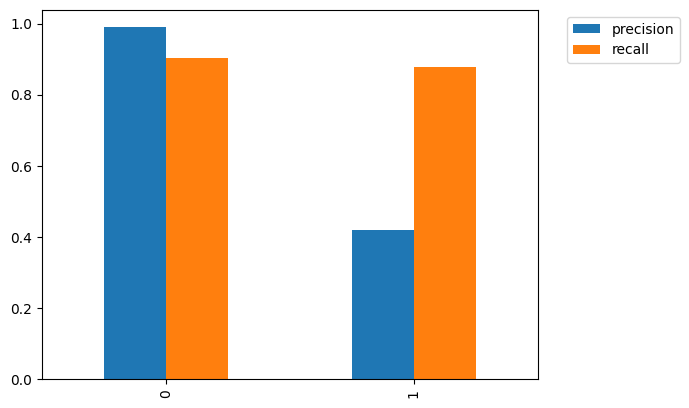

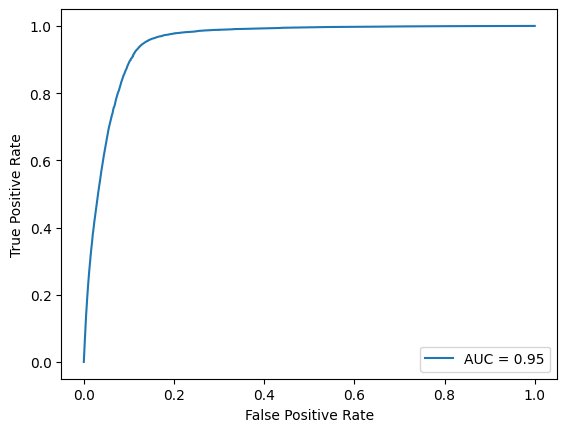

In [88]:
best_lr = LogisticRegression(penalty='l1', solver='liblinear', C=10)

best_lr.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = best_lr.predict(X_test)
y_pred_proba = best_lr.predict_proba(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#roc
plot_ROC_Curve(y_test, y_pred, y_pred_proba)


              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236671
           1       0.59      0.42      0.49     18743

    accuracy                           0.94    255414
   macro avg       0.77      0.70      0.73    255414
weighted avg       0.93      0.94      0.93    255414

[[231300   5371]
 [ 10925   7818]]
                       0             1  accuracy      macro avg   weighted avg
precision       0.954897      0.592767  0.936198       0.773832       0.928323
recall          0.977306      0.417116  0.936198       0.697211       0.936198
f1-score        0.965972      0.489666  0.936198       0.727819       0.931019
support    236671.000000  18743.000000  0.936198  255414.000000  255414.000000
[[231300   5371]
 [ 10925   7818]]


,0,1,accuracy,macro avg,weighted avg
precision,0.954897,0.592767,0.936198,0.773832,0.928323
recall,0.977306,0.417116,0.936198,0.697211,0.936198
f1-score,0.965972,0.489666,0.936198,0.727819,0.931019
support,236671.000000,18743.000000,0.936198,255414.000000,255414.000000


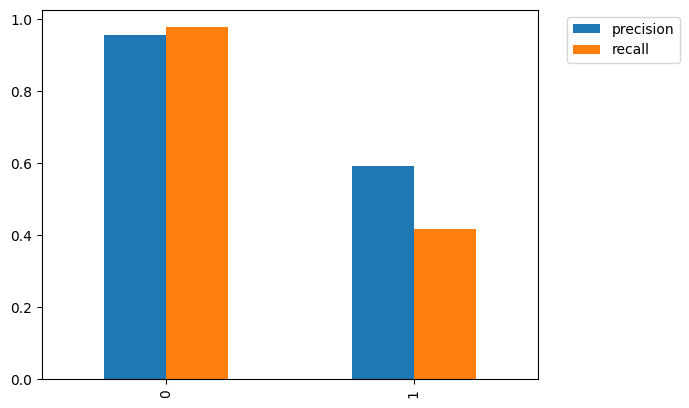

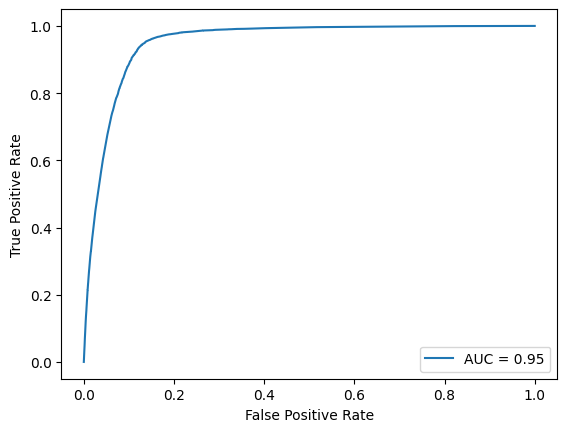

In [89]:
best_lr2 = LogisticRegression(penalty='l1', solver='liblinear', C=10)

best_lr2.fit(X_train, y_train)

y_pred = best_lr2.predict(X_test)
y_pred_proba = best_lr2.predict_proba(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#roc
plot_ROC_Curve(y_test, y_pred, y_pred_proba)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236671
           1       0.58      0.41      0.48     18743

    accuracy                           0.94    255414
   macro avg       0.77      0.69      0.72    255414
weighted avg       0.93      0.94      0.93    255414

[[231176   5495]
 [ 11052   7691]]
                       0             1  accuracy      macro avg   weighted avg
precision       0.954374      0.583270  0.935215       0.768822       0.927141
recall          0.976782      0.410340  0.935215       0.693561       0.935215
f1-score        0.965448      0.481756  0.935215       0.723602       0.929953
support    236671.000000  18743.000000  0.935215  255414.000000  255414.000000
[[231176   5495]
 [ 11052   7691]]


,0,1,accuracy,macro avg,weighted avg
precision,0.954374,0.583270,0.935215,0.768822,0.927141
recall,0.976782,0.410340,0.935215,0.693561,0.935215
f1-score,0.965448,0.481756,0.935215,0.723602,0.929953
support,236671.000000,18743.000000,0.935215,255414.000000,255414.000000


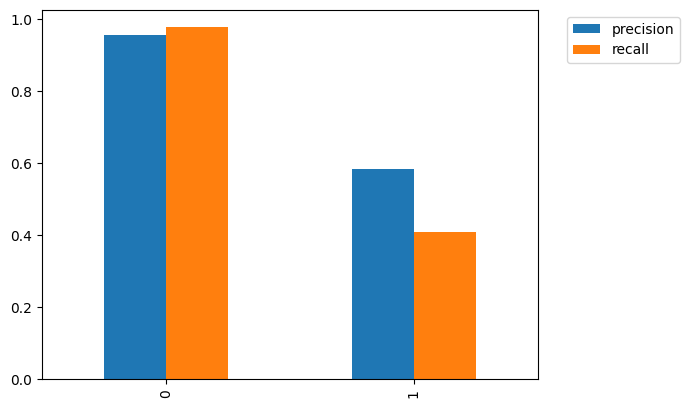

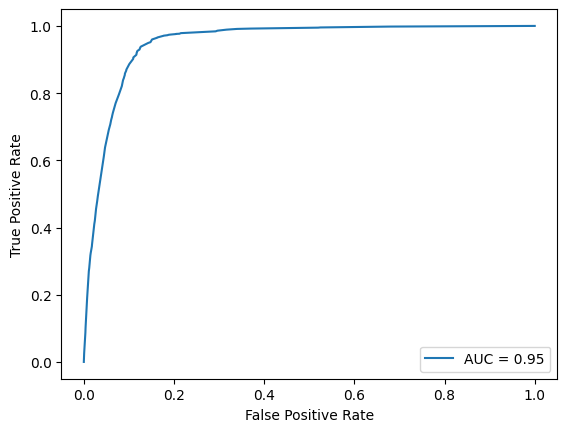

In [90]:
best_lr2 = LogisticRegression(penalty='l1', solver='liblinear', C=10)

best_lr2.fit(X_train_feature_reduced , y_train_feature_reduced)

y_pred = best_lr2.predict(X_test_feature_reduced)
y_pred_proba = best_lr2.predict_proba(X_test_feature_reduced)

print(classification_report(y_test_feature_reduced, y_pred))
print(confusion_matrix(y_test_feature_reduced, y_pred))

#roc
plot_ROC_Curve(y_test_feature_reduced, y_pred, y_pred_proba)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    236671
           1       0.43      0.87      0.57     18743

    accuracy                           0.90    255414
   macro avg       0.71      0.89      0.76    255414
weighted avg       0.95      0.90      0.92    255414

[[214809  21862]
 [  2476  16267]]
                       0             1  accuracy      macro avg   weighted avg
precision       0.988605      0.426631  0.904712       0.707618       0.947366
recall          0.907627      0.867897  0.904712       0.887762       0.904712
f1-score        0.946387      0.572057  0.904712       0.759222       0.918917
support    236671.000000  18743.000000  0.904712  255414.000000  255414.000000
[[214809  21862]
 [  2476  16267]]


,0,1,accuracy,macro avg,weighted avg
precision,0.988605,0.426631,0.904712,0.707618,0.947366
recall,0.907627,0.867897,0.904712,0.887762,0.904712
f1-score,0.946387,0.572057,0.904712,0.759222,0.918917
support,236671.000000,18743.000000,0.904712,255414.000000,255414.000000


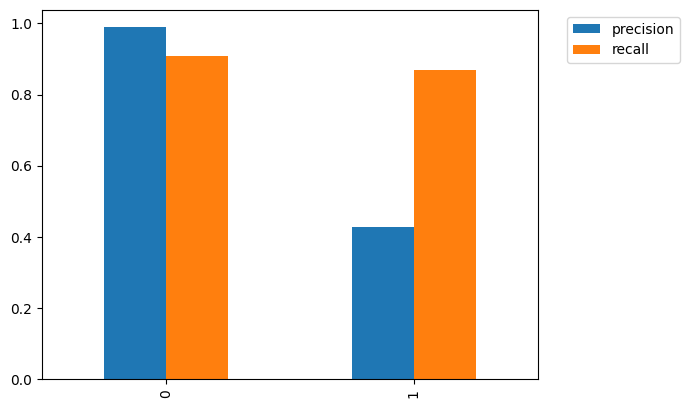

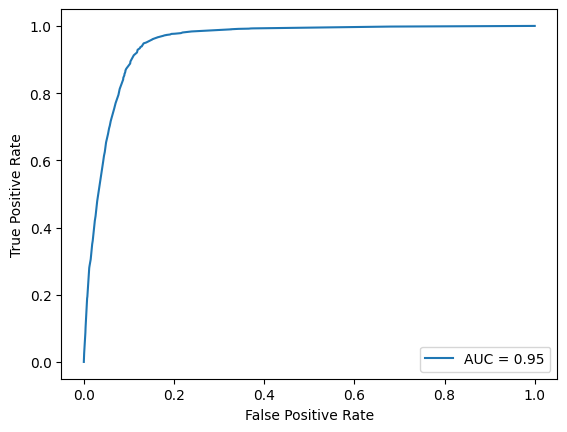

In [91]:
best_lr2 = LogisticRegression(penalty='l1', solver='liblinear', C=10)

best_lr2.fit(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE)

y_pred = best_lr2.predict(X_test_feature_reduced)
y_pred_proba = best_lr2.predict_proba(X_test_feature_reduced)

print(classification_report(y_test_feature_reduced, y_pred))
print(confusion_matrix(y_test_feature_reduced, y_pred))

#roc
plot_ROC_Curve(y_test_feature_reduced, y_pred, y_pred_proba)

##### Observations


We see that even though the scores for the best models are high , on the Test set, the precision is quite low and recall is high for the positive samples (Samples where patients have died due to covid).

Number of false positives is greater than the number of true positives which is not a sign of a good model

We would want to have a better precision compared to the best Logistsic regression model

####XGBoost

In [93]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 10, 20],
    'n_estimators':[10,20,50]
}
# Create XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logitraw')

# Create GridSearchCV object
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring=['f1','accuracy','precision', 'recall'], refit='f1', cv=5)


In [47]:
# Fit the model
grid.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters:  {'max_depth': 20, 'n_estimators': 50}
Best score:  0.34270155025936877


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_f1,split1_test_f1,split2_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,6.229614,0.729943,0.226747,0.007497,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.016438,0.031690,0.008895,...,0.285737,9,0.008322,0.016197,0.004474,0.037584,0.000000,0.013315,0.013249,9
1,10.486763,0.537766,0.276882,0.061823,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.227565,0.214053,0.268890,...,0.007123,1,0.136376,0.126622,0.168143,0.211186,0.166174,0.161700,0.029605,8
2,24.252461,0.169638,0.271053,0.007305,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.341593,0.329437,0.321171,...,0.008791,2,0.229441,0.218166,0.211096,0.239911,0.228725,0.225468,0.009948,6
3,18.549174,0.891044,0.268902,0.008524,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.329513,0.340148,0.334868,...,0.008688,3,0.218702,0.228546,0.224519,0.237494,0.217897,0.225432,0.007185,7
4,36.675185,0.372801,0.326422,0.008018,10,20,"{'max_depth': 10, 'n_estimators': 20}",0.334362,0.336919,0.337165,...,0.007984,4,0.222998,0.225593,0.227025,0.244832,0.228635,0.229817,0.007733,4
5,89.013012,0.213404,0.505744,0.008209,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.336224,0.336817,0.340280,...,0.005974,5,0.225503,0.226398,0.230872,0.242595,0.231051,0.231284,0.006090,3
6,30.381410,0.659458,0.351488,0.094397,20,10,"{'max_depth': 20, 'n_estimators': 10}",0.331214,0.336560,0.332782,...,0.006732,6,0.221387,0.227114,0.225056,0.238926,0.226756,0.227848,0.005899,5
7,67.203661,0.413341,0.521147,0.149086,20,20,"{'max_depth': 20, 'n_estimators': 20}",0.339124,0.339568,0.335020,...,0.006046,7,0.229709,0.230694,0.228098,0.243132,0.231678,0.232662,0.005367,2
8,185.455222,1.372039,1.212237,0.365245,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.337022,0.340509,0.338696,...,0.005879,8,0.228904,0.232841,0.232662,0.245459,0.235168,0.235007,0.005598,1


Best model is got with hyperparameters 'max_depth': 20, 'n_estimators': 50
we wil fit the training set with this model and observe the classification report 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236671
           1       0.59      0.38      0.46     18743

    accuracy                           0.94    255414
   macro avg       0.77      0.68      0.71    255414
weighted avg       0.93      0.94      0.93    255414

[[231799   4872]
 [ 11608   7135]]
                       0             1  accuracy      macro avg   weighted avg
precision       0.952310      0.594237  0.935477       0.773274       0.926034
recall          0.979414      0.380675  0.935477       0.680045       0.935477
f1-score        0.965672      0.464065  0.935477       0.714869       0.928863
support    236671.000000  18743.000000  0.935477  255414.000000  255414.000000
[[231799   4872]
 [ 11608   7135]]


,0,1,accuracy,macro avg,weighted avg
precision,0.952310,0.594237,0.935477,0.773274,0.926034
recall,0.979414,0.380675,0.935477,0.680045,0.935477
f1-score,0.965672,0.464065,0.935477,0.714869,0.928863
support,236671.000000,18743.000000,0.935477,255414.000000,255414.000000


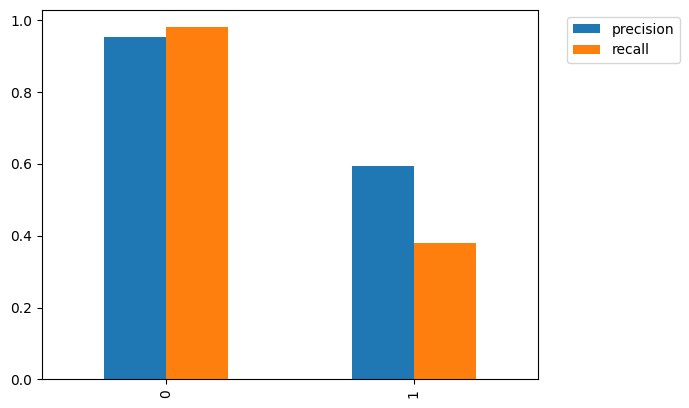

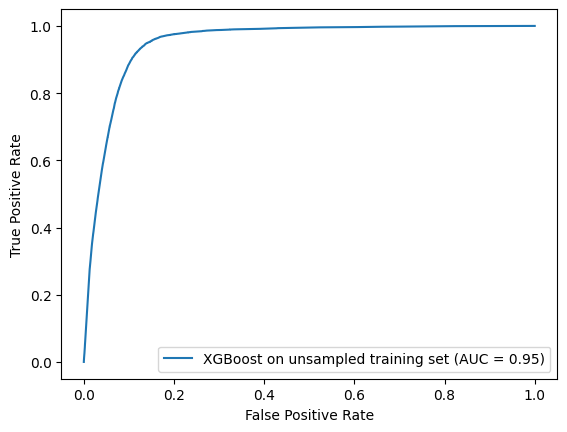

In [94]:
xgb_best_model = xgb.XGBClassifier(n_estimators=50, max_depth= 20)

X_train, y_train = shuffle(X_train, y_train, random_state=2023)
xgb_best_model.fit(X_train, y_train)

y_pred = xgb_best_model.predict(X_test)
y_pred_proba = xgb_best_model.predict_proba(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#roc and precision and recall graphs 
y_pred_proba = xgb_best_model.predict_proba(X_test)

#roc
plot_ROC_Curve(y_test, y_pred, y_pred_proba, "XGBoost on unsampled training set")

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236671
           1       0.64      0.33      0.44     18743

    accuracy                           0.94    255414
   macro avg       0.79      0.66      0.70    255414
weighted avg       0.93      0.94      0.93    255414

[[233101   3570]
 [ 12526   6217]]
                       0             1  accuracy      macro avg   weighted avg
precision       0.949004      0.635230  0.936981       0.792117       0.925978
recall          0.984916      0.331697  0.936981       0.658306       0.936981
f1-score        0.966626      0.435822  0.936981       0.701224       0.927675
support    236671.000000  18743.000000  0.936981  255414.000000  255414.000000
[[233101   3570]
 [ 12526   6217]]


,0,1,accuracy,macro avg,weighted avg
precision,0.949004,0.635230,0.936981,0.792117,0.925978
recall,0.984916,0.331697,0.936981,0.658306,0.936981
f1-score,0.966626,0.435822,0.936981,0.701224,0.927675
support,236671.000000,18743.000000,0.936981,255414.000000,255414.000000


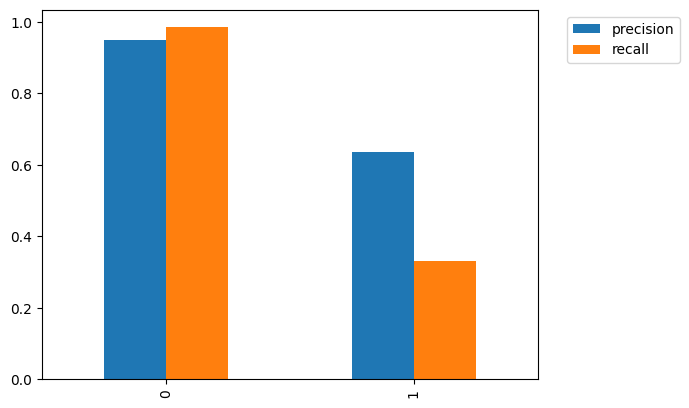

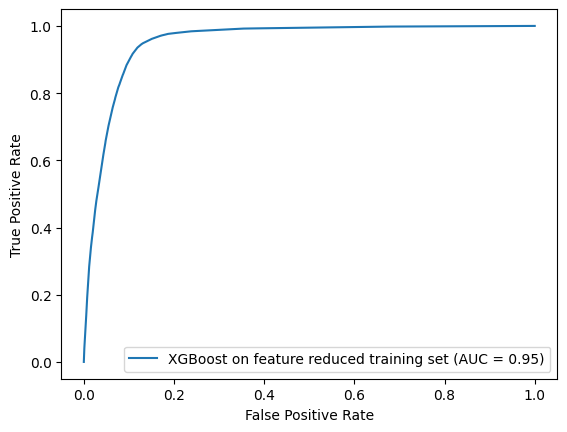

In [95]:
X_train_feature_reduced , y_train_feature_reduced = shuffle(X_train_feature_reduced , y_train_feature_reduced, random_state=2023)
xgb_best_model.fit(X_train_feature_reduced , y_train_feature_reduced)

y_pred = xgb_best_model.predict(X_test_feature_reduced)

print(classification_report(y_test_feature_reduced, y_pred))
print(confusion_matrix(y_test_feature_reduced, y_pred))

y_pred_proba = xgb_best_model.predict_proba(X_test_feature_reduced)

#roc and precision and recall graphs 
plot_ROC_Curve(y_test_feature_reduced, y_pred, y_pred_proba, "XGBoost on feature reduced training set")

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236671
           1       0.40      0.89      0.55     18743

    accuracy                           0.89    255414
   macro avg       0.69      0.89      0.74    255414
weighted avg       0.95      0.89      0.91    255414

[[211571  25100]
 [  2148  16595]]
                       0             1  accuracy      macro avg   weighted avg
precision       0.989949      0.398009  0.893318       0.693979       0.946511
recall          0.893946      0.885397  0.893318       0.889671       0.893318
f1-score        0.939501      0.549158  0.893318       0.744330       0.910857
support    236671.000000  18743.000000  0.893318  255414.000000  255414.000000
[[211571  25100]
 [  2148  16595]]


,0,1,accuracy,macro avg,weighted avg
precision,0.989949,0.398009,0.893318,0.693979,0.946511
recall,0.893946,0.885397,0.893318,0.889671,0.893318
f1-score,0.939501,0.549158,0.893318,0.744330,0.910857
support,236671.000000,18743.000000,0.893318,255414.000000,255414.000000


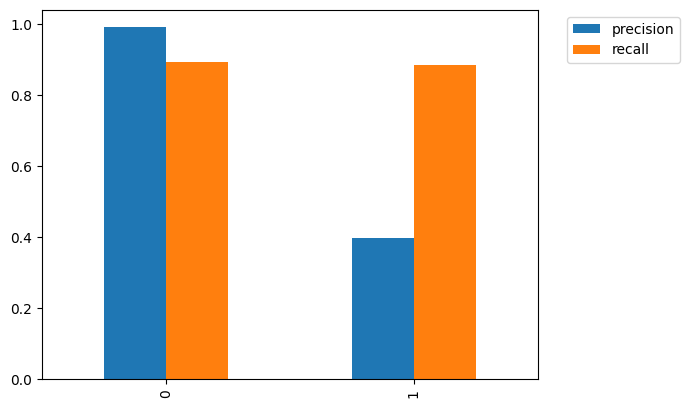

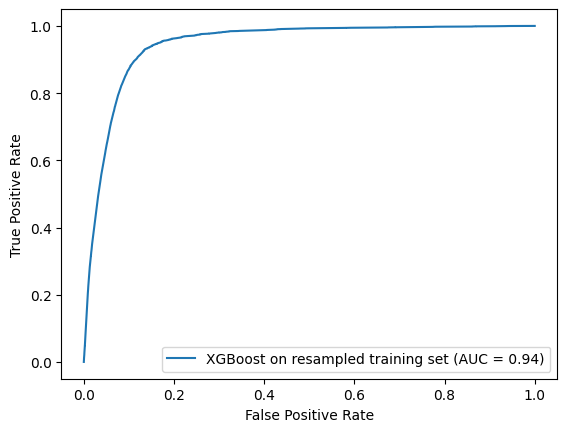

In [96]:
X_train_SMOTE , y_train_SMOTE = shuffle(X_train_SMOTE , y_train_SMOTE, random_state=2023)
xgb_best_model.fit(X_train_SMOTE , y_train_SMOTE)

y_pred = xgb_best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

y_pred_proba = xgb_best_model.predict_proba(X_test)

#roc
plot_ROC_Curve(y_test, y_pred, y_pred_proba, "XGBoost on resampled training set")

              precision    recall  f1-score   support

           0       0.99      0.88      0.93    236671
           1       0.39      0.93      0.55     18743

    accuracy                           0.89    255414
   macro avg       0.69      0.91      0.74    255414
weighted avg       0.95      0.89      0.91    255414

[[208736  27935]
 [  1231  17512]]
                       0             1  accuracy      macro avg   weighted avg
precision       0.994137      0.385328  0.885809       0.689733       0.949461
recall          0.881967      0.934322  0.885809       0.908145       0.885809
f1-score        0.934699      0.545630  0.885809       0.740164       0.906148
support    236671.000000  18743.000000  0.885809  255414.000000  255414.000000
[[208736  27935]
 [  1231  17512]]


,0,1,accuracy,macro avg,weighted avg
precision,0.994137,0.385328,0.885809,0.689733,0.949461
recall,0.881967,0.934322,0.885809,0.908145,0.885809
f1-score,0.934699,0.545630,0.885809,0.740164,0.906148
support,236671.000000,18743.000000,0.885809,255414.000000,255414.000000


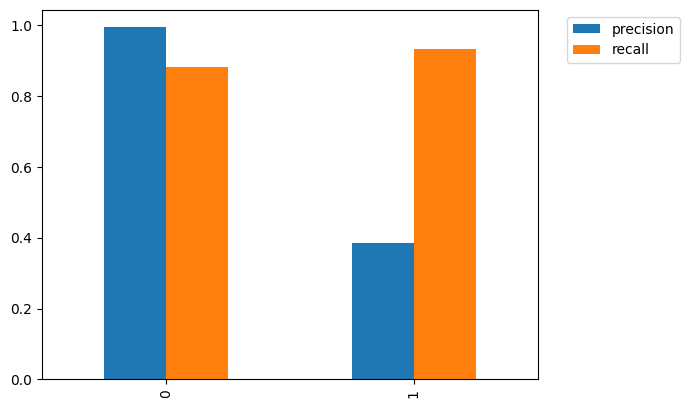

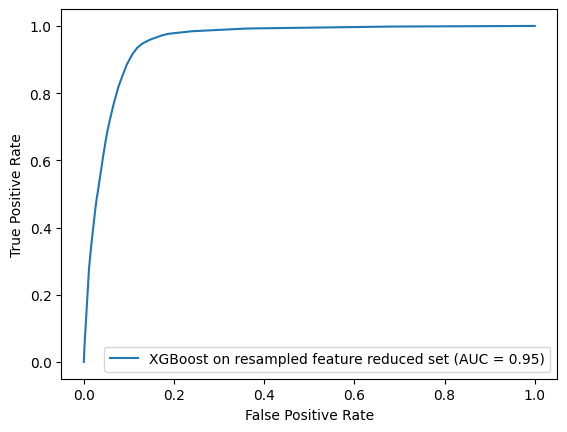

In [97]:
X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE = shuffle(
    X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, random_state=2023)

xgb_best_model.fit(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE)

y_pred = xgb_best_model.predict(X_test_feature_reduced)

print(classification_report(y_test_feature_reduced, y_pred))
print(confusion_matrix(y_test_feature_reduced, y_pred))

y_pred_proba = xgb_best_model.predict_proba(X_test_feature_reduced)

#roc
plot_ROC_Curve(y_test_feature_reduced, y_pred, y_pred_proba, "XGBoost on resampled feature reduced set")

##### Observations

As we use the originl preprocessed dataset without feature reduction or oversampling we see that the precision values are high which is needed but the recall is pretty and this is also similar in case of feature reduced dataset 

However when we resample and train the model , it suddenly has very high recall and low precision value . Indicating it maybe overfitting due to increased positive samples 

Even though the XGBoost gives us better results compared to logisitic regression , the time to train is more compared to logistic regression and as mentioned above , it is sensitive to data resampling

####Decision Trees

In [45]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
 'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [3, 5, 7, 9],
 'class_weight': [None, 'balanced'],
 'min_samples_leaf': [5, 10, 15, 20]
}
 
# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
 
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, 
 cv=5, scoring=['accuracy', 'recall', 'precision', 'f1'], refit='f1')
 
grid_search.fit(X_train, y_train)
 
# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)
print(pd.DataFrame(grid_search.cv_results_))

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 10, 'splitter': 'best'}
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.886138      0.555445         0.370134        0.253513   
1         0.953381      0.155238         0.229368        0.051543   
2         0.928497      0.089461         0.194115        0.015342   
3         0.931027      0.089496         0.207740        0.043238   
4         0.901303      0.143391         0.205245        0.043297   
..             ...           ...              ...             ...   
123       2.639405      0.258312         0.232145        0.035053   
124       2.657950      0.229928         0.221170        0.044329   
125       2.683245      0.432013         0.198524        0.005898   
126       2.423862      0.221490         0.219230        0.040570   
127       2.518053      0.221637         0.238986        0.043791   

    param_class_weight param_criteri

Best parameters are - 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 10, 'splitter': 'best'

In [98]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
 
def fitting(X_in, y, Xtest, ytest, criterion, splitter, mdepth, clweight, minleaf):
 
 # Fit the model
 model = DecisionTreeClassifier(criterion=criterion, 
 splitter=splitter, 
 max_depth=mdepth,
 class_weight=clweight,
 min_samples_leaf=minleaf, 
 random_state=0, 
 )
 clf = model.fit(X_in, y)
 
 
 # Predict class labels on training data
 pred_labels_tr = model.predict(Xtest)

 pred_labels_tr_proba = model.predict_proba(Xtest)
 
 # Use score method to get accuracy of the model
 print('*************** Tree Summary ***************')
 print('Classes: ', clf.classes_)
 print('Tree Depth: ', clf.tree_.max_depth)
 print('No. of leaves: ', clf.tree_.n_leaves)
 print('No. of features: ', X_in.shape[1])
 print('--------------------------------------------------------')
 print("")
 
 print('*************** Evaluation on Training Data ***************')
 score_tr = model.score(Xtest, ytest)
 print('Accuracy Score: ', score_tr)
 # Look at classification report to evaluate the model
 print(classification_report(ytest, pred_labels_tr))
 print('--------------------------------------------------------')

 plot_ROC_Curve(ytest, pred_labels_tr, pred_labels_tr_proba)
 
 # Return relevant data for chart plotting
 return clf
 


*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  9
No. of leaves:  443
No. of features:  23
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9373135380206253
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236671
           1       0.63      0.36      0.46     18743

    accuracy                           0.94    255414
   macro avg       0.79      0.67      0.71    255414
weighted avg       0.93      0.94      0.93    255414

--------------------------------------------------------
                       0             1  accuracy      macro avg   weighted avg
precision       0.950978      0.626857  0.937314       0.788918       0.927193
recall          0.983023      0.360134  0.937314       0.671579       0.937314
f1-score        0.966735      0.457457  0.937314       0.712096       0.929363
support    236671.000000  187

,0,1,accuracy,macro avg,weighted avg
precision,0.950978,0.626857,0.937314,0.788918,0.927193
recall,0.983023,0.360134,0.937314,0.671579,0.937314
f1-score,0.966735,0.457457,0.937314,0.712096,0.929363
support,236671.000000,18743.000000,0.937314,255414.000000,255414.000000


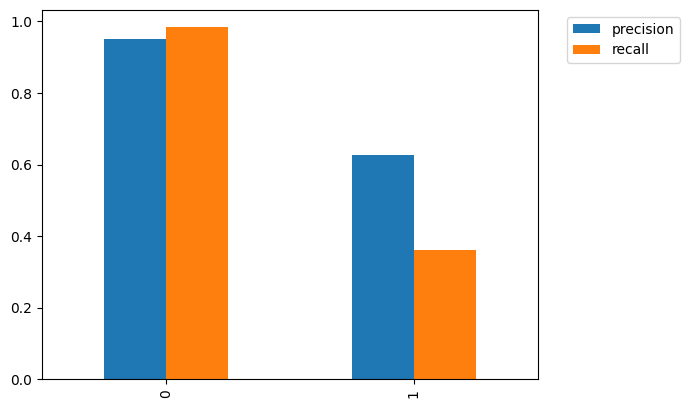

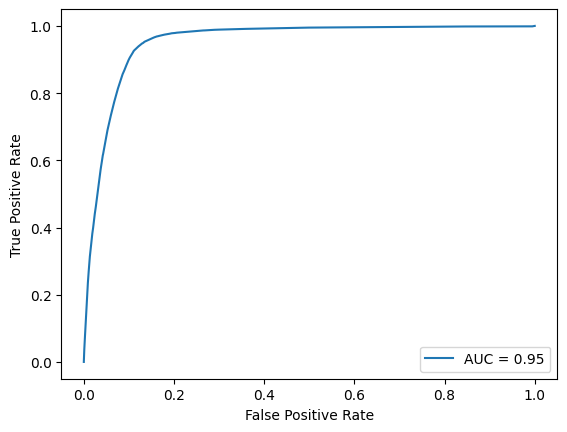

In [99]:
X_train, y_train = shuffle(X_train, y_train, random_state=2023)
clf = fitting(X_train, y_train, X_test, y_test,'entropy', 'best', mdepth=9, clweight=None, minleaf=10)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  8
No. of leaves:  128
No. of features:  8
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9369807449865708
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236671
           1       0.64      0.33      0.44     18743

    accuracy                           0.94    255414
   macro avg       0.79      0.66      0.70    255414
weighted avg       0.93      0.94      0.93    255414

--------------------------------------------------------
                       0             1  accuracy      macro avg   weighted avg
precision       0.949004      0.635230  0.936981       0.792117       0.925978
recall          0.984916      0.331697  0.936981       0.658306       0.936981
f1-score        0.966626      0.435822  0.936981       0.701224       0.927675
support    236671.000000  1874

,0,1,accuracy,macro avg,weighted avg
precision,0.949004,0.635230,0.936981,0.792117,0.925978
recall,0.984916,0.331697,0.936981,0.658306,0.936981
f1-score,0.966626,0.435822,0.936981,0.701224,0.927675
support,236671.000000,18743.000000,0.936981,255414.000000,255414.000000


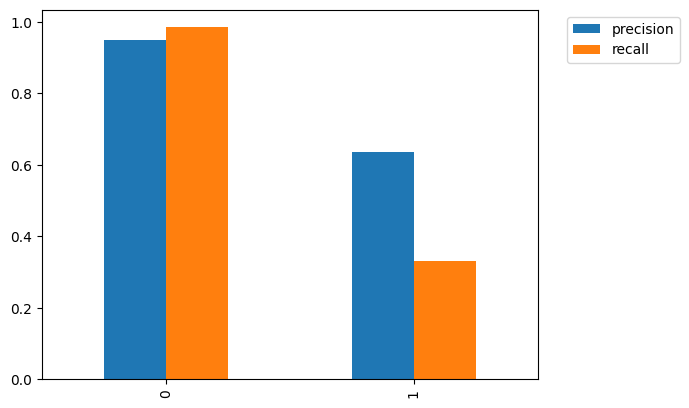

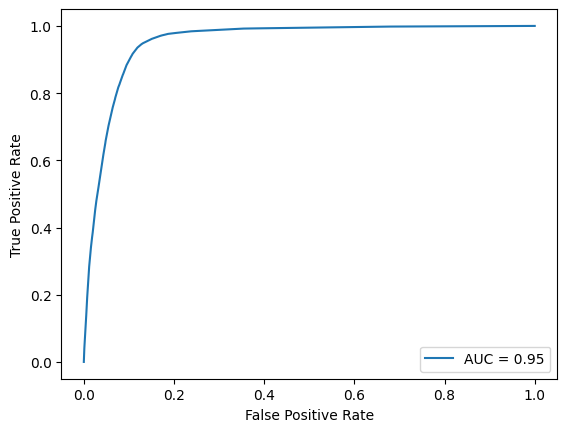

In [100]:
X_train_feature_reduced, y_train_feature_reduced = shuffle(
    X_train_feature_reduced, y_train_feature_reduced, random_state=2023)

clf = fitting(X_train_feature_reduced, y_train_feature_reduced, 
              X_test_feature_reduced, y_test_feature_reduced ,'entropy', 'best', mdepth=9, clweight=None, minleaf=10)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  9
No. of leaves:  396
No. of features:  23
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8890037351124057
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236671
           1       0.39      0.93      0.55     18743

    accuracy                           0.89    255414
   macro avg       0.69      0.91      0.74    255414
weighted avg       0.95      0.89      0.91    255414

--------------------------------------------------------
                       0             1  accuracy      macro avg   weighted avg
precision       0.993621      0.391815  0.889004       0.692718       0.949459
recall          0.885901      0.928187  0.889004       0.907044       0.889004
f1-score        0.936674      0.551026  0.889004       0.743850       0.908374
support    236671.000000  187

,0,1,accuracy,macro avg,weighted avg
precision,0.993621,0.391815,0.889004,0.692718,0.949459
recall,0.885901,0.928187,0.889004,0.907044,0.889004
f1-score,0.936674,0.551026,0.889004,0.743850,0.908374
support,236671.000000,18743.000000,0.889004,255414.000000,255414.000000


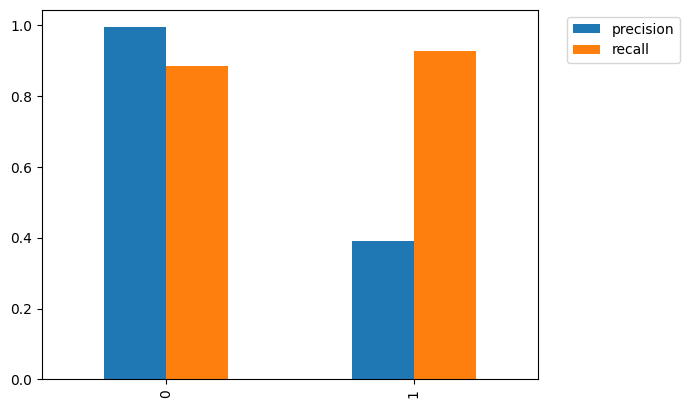

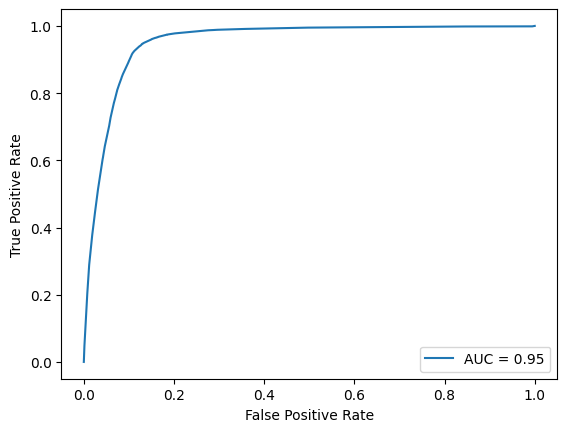

In [101]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)
clf = fitting(X_train_SMOTE, y_train_SMOTE, X_test, y_test,'entropy', 'best', mdepth=9, clweight=None, minleaf=10)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  8
No. of leaves:  128
No. of features:  8
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8858089219854824
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    236671
           1       0.39      0.93      0.55     18743

    accuracy                           0.89    255414
   macro avg       0.69      0.91      0.74    255414
weighted avg       0.95      0.89      0.91    255414

--------------------------------------------------------
                       0             1  accuracy      macro avg   weighted avg
precision       0.994137      0.385328  0.885809       0.689733       0.949461
recall          0.881967      0.934322  0.885809       0.908145       0.885809
f1-score        0.934699      0.545630  0.885809       0.740164       0.906148
support    236671.000000  1874

,0,1,accuracy,macro avg,weighted avg
precision,0.994137,0.385328,0.885809,0.689733,0.949461
recall,0.881967,0.934322,0.885809,0.908145,0.885809
f1-score,0.934699,0.545630,0.885809,0.740164,0.906148
support,236671.000000,18743.000000,0.885809,255414.000000,255414.000000


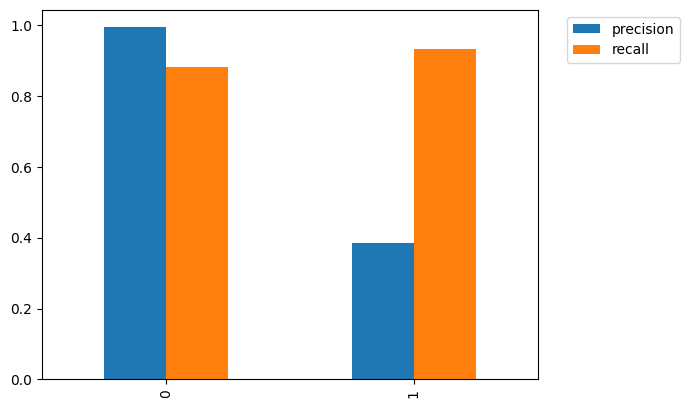

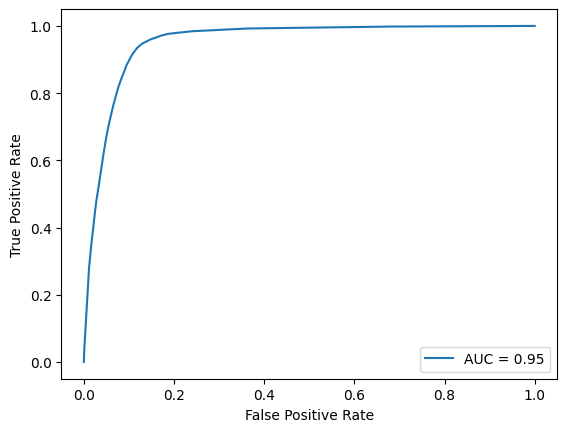

In [102]:
X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE = shuffle(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, random_state=2023)
clf = fitting(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, X_test_feature_reduced, y_test,'entropy', 'best', mdepth=9, clweight=None, minleaf=10)

##### Observations

The results of DT are similar to that of Logisitic regression and we see that the timing for computation is significantly less compared to XGBoost 

However, the model is very sensitive towards data resampling as recall is extremely high while precision is very low in case of resampled dataset 

This could still be considered for modelling purpose as it has the added advantage of good accuracy and precision values when data is not resampled along with lesser computation time

Logistic Regression< XGBoost <= Decision Trees

### Custom Models

#### Class-Specific Ensemble Model

In [103]:
def print_scoring_reports(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  print(classification_report(y_true, y_pred))
  print("Confusion matrix:\n", cm)

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

def custom_ensemble_1(X, y, gridsearch=True, X_val=None, y_val=None, pos_sample_ratio_to_add=0.85, neg_sample_ratio_to_add=0.01):

  # separate positive and negative samples
  X_train_pos = X[y == 1]
  y_train_pos = y[y == 1]
  X_train_neg = X[y == 0]
  y_train_neg = y[y == 0]

  X_train_neg, y_train_neg = shuffle(X_train_neg, y_train_neg, random_state=2023)
  
  X_train_pos_neg = pd.concat([X_train_pos, X_train_neg[: int(neg_sample_ratio_to_add * len(X_train_neg))]])
  y_train_pos_neg = pd.concat([y_train_pos, y_train_neg[: int(neg_sample_ratio_to_add * len(X_train_neg))]])

  X_train_pos, y_train_pos = shuffle(X_train_pos, y_train_pos, random_state=2023)

  X_train_neg_pos = pd.concat([X_train_neg, X_train_pos[: int(pos_sample_ratio_to_add *len(X_train_pos))]])
  y_train_neg_pos = pd.concat([y_train_neg, y_train_pos[: int(pos_sample_ratio_to_add *len(X_train_pos))]])

  print(y_train_pos_neg.value_counts(), y_train_neg_pos.value_counts())

  # Define individual classifiers
  clf1 = make_pipeline(DecisionTreeClassifier(random_state=2023, 
                                              splitter='best',
                                              criterion='entropy',
                                              min_samples_leaf=10, 
                                              
                                              max_depth=5))
  clf2 = make_pipeline(DecisionTreeClassifier(random_state=2023, 
                                              splitter='best',
                                              criterion='entropy',
                                              min_samples_leaf=10, 
                                              max_depth=5))

  # Fit classifiers on masked data
  clf1.fit(X_train_pos_neg, y_train_pos_neg)
  clf2.fit(X_train_neg_pos, y_train_neg_pos)

  # Define the ensemble model
  ensemble_model = VotingClassifier(estimators=[
      ('clf1', clf1),
      ('clf2', clf2)],
  voting='soft'
  )
  
  if gridsearch == True:
    param_grid = {}
    # Create GridSearchCV object
    grid = GridSearchCV(estimator=ensemble_model,  param_grid = param_grid,
                            scoring=['f1','accuracy','precision', 'recall'], refit='f1', cv=5)
    
    grid.fit(X,y)
    # Print best hyperparameters and corresponding score
    print("Best parameters: ", grid.best_params_)
    print("Best score: ", grid.best_score_)
    return pd.DataFrame(grid.cv_results_)
  else:
    ensemble_model.fit(X, y)
    y_pred_train = ensemble_model.predict(X)
    y_pred_proba = ensemble_model.predict_proba(X_val)
    y_pred = ensemble_model.predict(X_val)
    return y_pred, y_pred_proba, y_pred_train



In [100]:
custom_ensemble_1(X_train, y_train, True)

1    55691
0     7105
Name: DEATH, dtype: int64 0    710550
1     47337
Name: DEATH, dtype: int64
Best parameters:  {}
Best score:  0.39589770033010174


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,2.41246,0.356327,0.242468,0.047199,{},0.394709,0.395128,0.396869,0.396186,0.396596,...,0.003615,1,0.283957,0.283983,0.284521,0.285419,0.284521,0.28448,0.00053,1


1    55812
0     7104
Name: DEATH, dtype: int64 0    710429
1     47440
Name: DEATH, dtype: int64
                       0             1  accuracy      macro avg   weighted avg
precision       0.944795      0.658267  0.936159       0.801531       0.923769
recall          0.988883      0.270394  0.936159       0.629639       0.936159
f1-score        0.966337      0.383330  0.936159       0.674833       0.923554
support    236671.000000  18743.000000  0.936159  255414.000000  255414.000000
[[234040   2631]
 [ 13675   5068]]


,0,1,accuracy,macro avg,weighted avg
precision,0.944795,0.658267,0.936159,0.801531,0.923769
recall,0.988883,0.270394,0.936159,0.629639,0.936159
f1-score,0.966337,0.383330,0.936159,0.674833,0.923554
support,236671.000000,18743.000000,0.936159,255414.000000,255414.000000


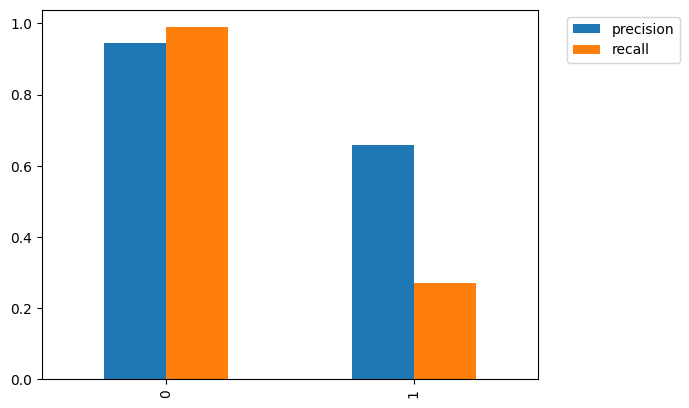

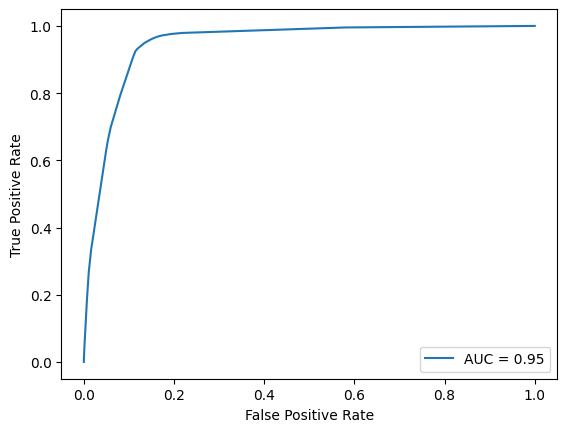

In [105]:
X_train, y_train = shuffle(X_train, y_train, random_state=2023)
y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(X_train, y_train, False, X_test, y_test)


#roc
plot_ROC_Curve(y_test, y_pred, y_pred_proba)

1    355214
0      5920
Name: DEATH, dtype: int64 0    592023
1    301931
Name: DEATH, dtype: int64
                       0             1  accuracy      macro avg   weighted avg
precision       0.993523      0.387604  0.887156       0.690563       0.949059
recall          0.883982      0.927226  0.887156       0.905604       0.887156
f1-score        0.935557      0.546681  0.887156       0.741119       0.907020
support    236671.000000  18743.000000  0.887156  255414.000000  255414.000000
[[209213  27458]
 [  1364  17379]]


,0,1,accuracy,macro avg,weighted avg
precision,0.993523,0.387604,0.887156,0.690563,0.949059
recall,0.883982,0.927226,0.887156,0.905604,0.887156
f1-score,0.935557,0.546681,0.887156,0.741119,0.907020
support,236671.000000,18743.000000,0.887156,255414.000000,255414.000000


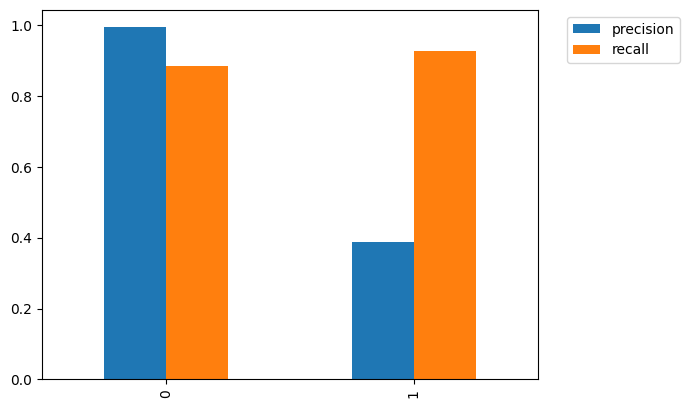

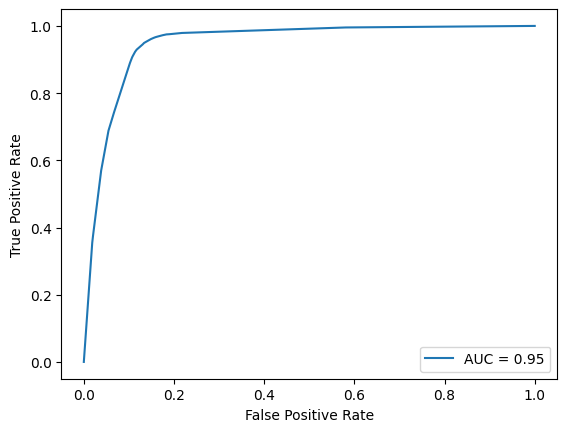

In [106]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)
y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(X_train_SMOTE, y_train_SMOTE, False, X_test, y_test)


#roc
plot_ROC_Curve(y_test, y_pred, y_pred_proba)

1    55812
0     7104
Name: DEATH, dtype: int64 0    710429
1     47440
Name: DEATH, dtype: int64
                       0             1  accuracy      macro avg   weighted avg
precision       0.946444      0.649829  0.936581       0.798137       0.924678
recall          0.987434      0.294457  0.936581       0.640945       0.936581
f1-score        0.966505      0.405272  0.936581       0.685889       0.925320
support    236671.000000  18743.000000  0.936581  255414.000000  255414.000000
[[233697   2974]
 [ 13224   5519]]


,0,1,accuracy,macro avg,weighted avg
precision,0.946444,0.649829,0.936581,0.798137,0.924678
recall,0.987434,0.294457,0.936581,0.640945,0.936581
f1-score,0.966505,0.405272,0.936581,0.685889,0.925320
support,236671.000000,18743.000000,0.936581,255414.000000,255414.000000


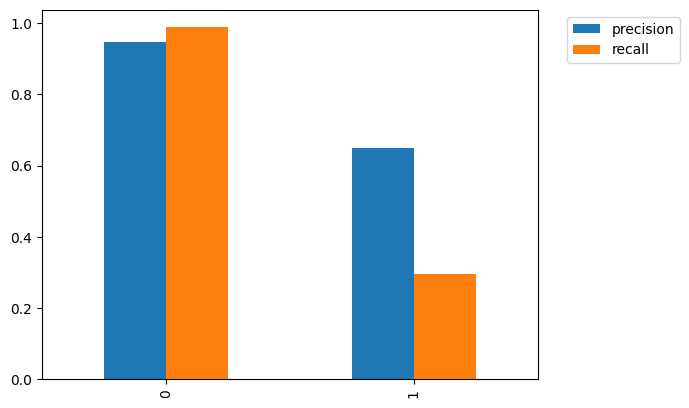

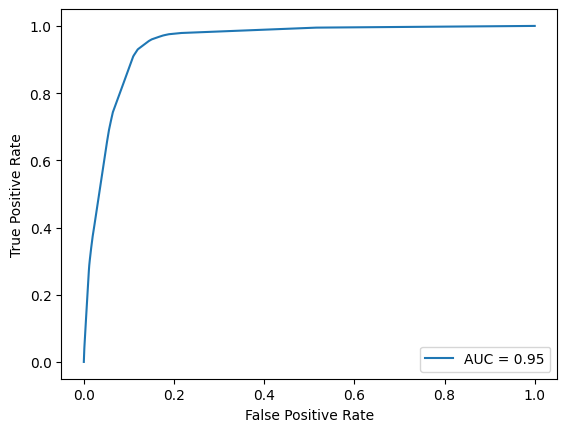

In [107]:
X_train_feature_reduced , y_train_feature_reduced = shuffle(
    X_train_feature_reduced , y_train_feature_reduced, random_state=2023)

y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(
    X_train_feature_reduced , y_train_feature_reduced, False, X_test_feature_reduced, y_test_feature_reduced)

#roc
plot_ROC_Curve(y_test, y_pred, y_pred_proba)

1    355214
0      5920
Name: DEATH, dtype: int64 0    592023
1    301931
Name: DEATH, dtype: int64
                       0             1  accuracy      macro avg   weighted avg
precision       0.992966      0.383511  0.885558       0.688239       0.948242
recall          0.882749      0.921037  0.885558       0.901893       0.885558
f1-score        0.934619      0.541533  0.885558       0.738076       0.905773
support    236671.000000  18743.000000  0.885558  255414.000000  255414.000000
[[208921  27750]
 [  1480  17263]]


,0,1,accuracy,macro avg,weighted avg
precision,0.992966,0.383511,0.885558,0.688239,0.948242
recall,0.882749,0.921037,0.885558,0.901893,0.885558
f1-score,0.934619,0.541533,0.885558,0.738076,0.905773
support,236671.000000,18743.000000,0.885558,255414.000000,255414.000000


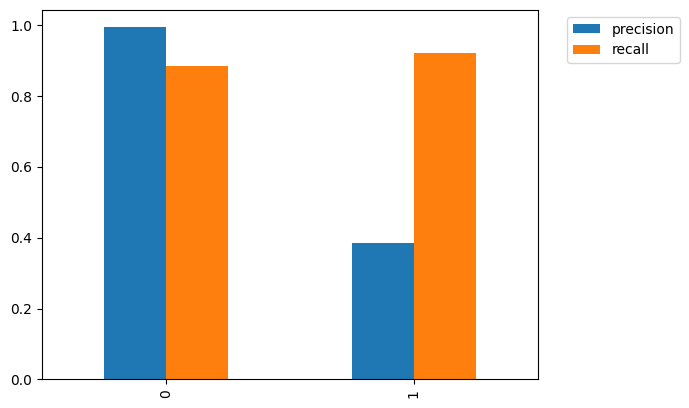

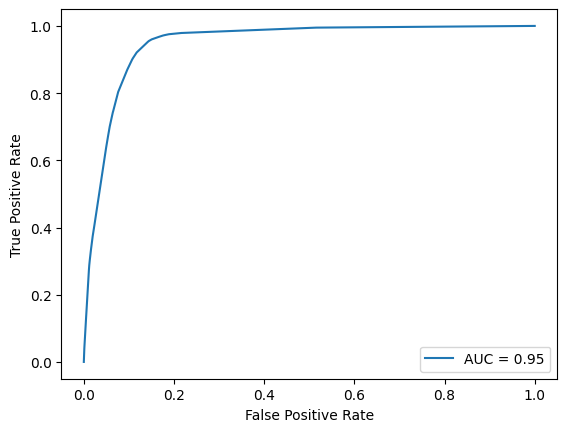

In [108]:
X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE = shuffle(
    X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, random_state=2023)

y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(
    X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, False, 
    X_test_feature_reduced, y_test_feature_reduced)

#roc
plot_ROC_Curve(y_test, y_pred, y_pred_proba)

#### Hybrid Ensemble Model

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

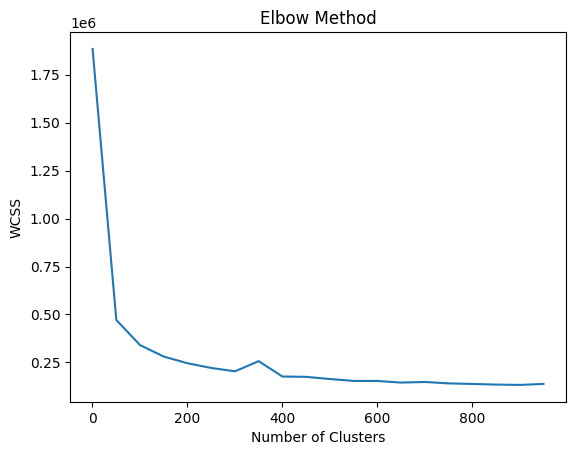

In [110]:
wcss = []
for i in range(1, 1000, 50):
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, random_state=2023, n_init='auto', max_no_improvement=2)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 1000, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

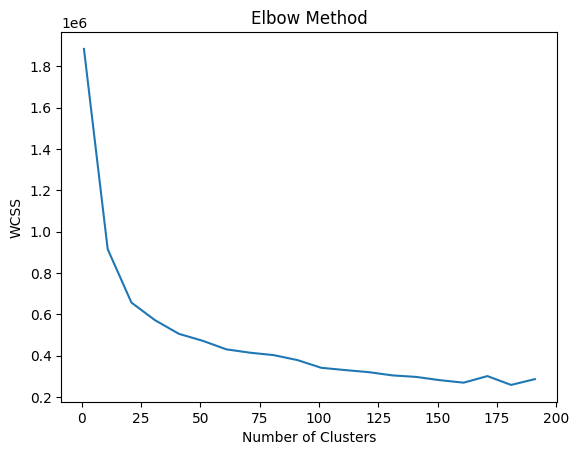

In [111]:
wcss = []
for i in range(1, 200, 10):
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, random_state=2023, n_init='auto', max_no_improvement=2)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 200, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [112]:
dict(zip(range(1,200,10),wcss))

{1: 1884243.9832582125,
 11: 915093.8933341992,
 21: 656260.5798677775,
 31: 570651.1016654605,
 41: 505010.6202673373,
 51: 471397.79511474026,
 61: 429922.2151492558,
 71: 413651.7685840345,
 81: 401786.281889712,
 91: 377821.9539612114,
 101: 340478.10865309625,
 111: 329600.5985734492,
 121: 319535.72732574854,
 131: 303741.56628560286,
 141: 296459.80353639903,
 151: 280588.9164940367,
 161: 268591.87713900045,
 171: 300378.35701870744,
 181: 257659.66139206017,
 191: 285676.8060846339}

Choosing 21 clusters as that is the knee where the slope starts becoming flat significantly

In [113]:
# Create MiniBatchKMeans object
kmeans = MiniBatchKMeans(n_clusters=21, batch_size=2000, random_state=2023, n_init='auto')

# Fit the model to the data
kmeans.fit(X_train)

# Get the cluster labels
labels = kmeans.labels_

# Combine the cluster labels and the target variable into a single DataFrame
results = pd.DataFrame({'Cluster': labels, 'Target': y_train})

# Convert 'Cluster' column into one-hot encoding
cluster_one_hot = pd.get_dummies(results['Cluster'], prefix='Cluster')

y_train_cluster = cluster_one_hot.copy()

y_train_cluster['Target'] = y_train

In [114]:
# predict clusters for X_test
test_cluster_labels = kmeans.predict(X_test)

test_cluster_results = pd.DataFrame({'Cluster': test_cluster_labels, 'Target': y_test})

# Convert 'Cluster' column into one-hot encoding
test_cluster_one_hot = pd.get_dummies(test_cluster_results['Cluster'], prefix='Cluster')

X_test_cluster = pd.concat([X_test, test_cluster_one_hot], axis=1)

In [115]:
clf = DecisionTreeClassifier(max_depth=70, random_state=0)
clf.fit(y_train_cluster.drop('Target', axis=1), y_train_cluster['Target'])
importances_in_clusters = clf.feature_importances_

In [116]:
important_clusters = dict(zip(y_train_cluster.columns,importances_in_clusters))
important_clusters = dict(sorted(important_clusters.items(), key=lambda x: x[1], reverse=True))
print(important_clusters)

{'Cluster_13': 0.3710265966018756, 'Cluster_10': 0.21377643345614433, 'Cluster_19': 0.17664936403013837, 'Cluster_16': 0.1198390878057824, 'Cluster_20': 0.07479017551616397, 'Cluster_4': 0.029593385832903794, 'Cluster_12': 0.007266470810799567, 'Cluster_18': 0.002707521719339509, 'Cluster_6': 0.0017063138553367364, 'Cluster_14': 0.0007044566247811553, 'Cluster_1': 0.0007026956642085934, 'Cluster_3': 0.00047373273534910744, 'Cluster_9': 0.0004100978257912237, 'Cluster_7': 0.00017564634655251854, 'Cluster_5': 0.00010644597761619629, 'Cluster_17': 3.694332419158096e-05, 'Cluster_2': 1.8084103019277653e-05, 'Cluster_0': 1.2294599574020982e-05, 'Cluster_8': 3.7062516307784725e-06, 'Cluster_11': 5.46918801119845e-07, 'Cluster_15': 0.0}


In [117]:
np.cumsum(list(important_clusters.values()))

array([0.3710266 , 0.58480303, 0.76145239, 0.88129148, 0.95608166,
       0.98567504, 0.99294151, 0.99564904, 0.99735535, 0.99805981,
       0.9987625 , 0.99923623, 0.99964633, 0.99982198, 0.99992842,
       0.99996537, 0.99998345, 0.99999575, 0.99999945, 1.        ,
       1.        ])

Text(0, 0.5, 'Importance of cumulative features')

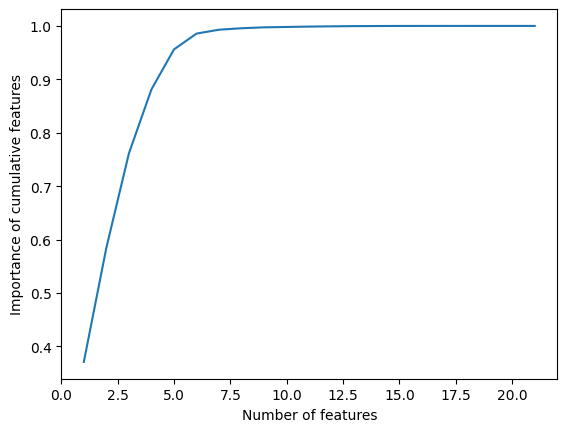

In [118]:
plt.plot(range(1, len(y_train_cluster.columns)), np.cumsum(list(important_clusters.values())))
plt.xlabel("Number of features")
plt.ylabel("Importance of cumulative features")

In [119]:
best_clusters = list(important_clusters.keys())[:np.argmax(np.cumsum(list(important_clusters.values())) >= 0.98)+1]
best_clusters

['Cluster_13',
 'Cluster_10',
 'Cluster_19',
 'Cluster_16',
 'Cluster_20',
 'Cluster_4']

In [120]:
def custom_ensemble_2(X,y, X_val, y_val):
  
  # Create MiniBatchKMeans object
  kmeans = MiniBatchKMeans(n_clusters=21, batch_size=1000, random_state=2023, n_init='auto')

  # Fit the model to the data
  kmeans.fit(X)

  # Get the cluster labels
  labels = kmeans.labels_

  # Combine the cluster labels and the target variable into a single DataFrame
  results = pd.DataFrame({'Cluster': labels, 'Target': y})

  # Convert 'Cluster' column into one-hot encoding
  cluster_one_hot = pd.get_dummies(results['Cluster'], prefix='Cluster')

  # Concatenate the best one-hot encoded 'Cluster' feature to X
  X_with_cluster = pd.concat([X, cluster_one_hot[best_clusters]], axis=1)
  # X_with_cluster = cluster_one_hot[best_clusters]

  # predict clusters for X_test
  test_cluster_labels = kmeans.predict(X_val)

  val_cluster_results = pd.DataFrame({'Cluster': test_cluster_labels, 'Target': y_val})

  # Convert 'Cluster' column into one-hot encoding
  val_cluster_one_hot = pd.get_dummies(val_cluster_results['Cluster'], prefix='Cluster')

  # Concatenate the best one-hot encoded 'Cluster' feature to X_val
  X_val_cluster = pd.concat([X_val, val_cluster_one_hot[best_clusters]], axis=1)
  # X_val_cluster = val_cluster_one_hot[best_clusters]

  # Compute the mean target value for each cluster
  mean_target = results.groupby('Cluster')['Target'].mean()

  # Numer of people who died vs number of who survived 
  # for label in np.unique(labels):
  #   print(f"\nCluster {label}:\n # dead: ",results[(results.Cluster == label) & (results.Target == 1)].shape[0],
  #         " vs # not dead: ",
  #         results[(results.Cluster == label) & (results.Target == 0)].shape[0])
    
  print("\n",mean_target,"\n")
  
  # Define individual classifiers
  #'entropy', 'best', mdepth=5, clweight=None, minleaf=10
  clf1 = make_pipeline(LogisticRegression(penalty='l1', solver='liblinear'))
  clf2 = make_pipeline(LogisticRegression(penalty='l1', solver='liblinear'))
  clf3 = make_pipeline(DecisionTreeClassifier(random_state=2023, max_depth=5,
                                              criterion='entropy', 
                                              splitter='best',
                                              min_samples_leaf=10))
  clf4 = make_pipeline(DecisionTreeClassifier(random_state=2023, max_depth=5,
                                              criterion='entropy', 
                                              splitter='best',
                                              min_samples_leaf=10))
  # Fit classifiers on masked data
  clf1.fit(X_with_cluster, y)
  clf2.fit(X_with_cluster, y)
  clf3.fit(X_with_cluster, y)
  clf4.fit(X_with_cluster, y)

  # Define the ensemble model
  ensemble_model = VotingClassifier(estimators=[
      ('clf1', clf1),
      ('clf2', clf2),
      ('clf3', clf3), 
      ('clf4', clf4)], 
      weights=[1, 1, 1, 1],
      voting = 'soft'
      )

  ensemble_model.fit(X_with_cluster, y)

  # Get the best model and print its accuracy
  y_pred = ensemble_model.predict(X_val_cluster)
  y_pred_proba = ensemble_model.predict_proba(X_val_cluster)
  return y_pred, y_pred_proba





 Cluster
0     0.016700
1     0.004854
2     0.001708
3     0.010425
4     0.260466
5     0.016776
6     0.004903
7     0.308776
8     0.029582
9     0.002940
10    0.499619
11    0.011090
12    0.005857
13    0.445886
14    0.008481
15    0.056855
16    0.386308
17    0.092076
18    0.323200
19    0.010515
20    0.003398
Name: Target, dtype: float64 

                       0             1  accuracy      macro avg   weighted avg
precision       0.947102      0.643018  0.936546       0.795060       0.924787
recall          0.986627      0.304167  0.936546       0.645397       0.936546
f1-score        0.966460      0.412981  0.936546       0.689721       0.925844
support    236671.000000  18743.000000  0.936546  255414.000000  255414.000000
[[233506   3165]
 [ 13042   5701]]


,0,1,accuracy,macro avg,weighted avg
precision,0.947102,0.643018,0.936546,0.795060,0.924787
recall,0.986627,0.304167,0.936546,0.645397,0.936546
f1-score,0.966460,0.412981,0.936546,0.689721,0.925844
support,236671.000000,18743.000000,0.936546,255414.000000,255414.000000


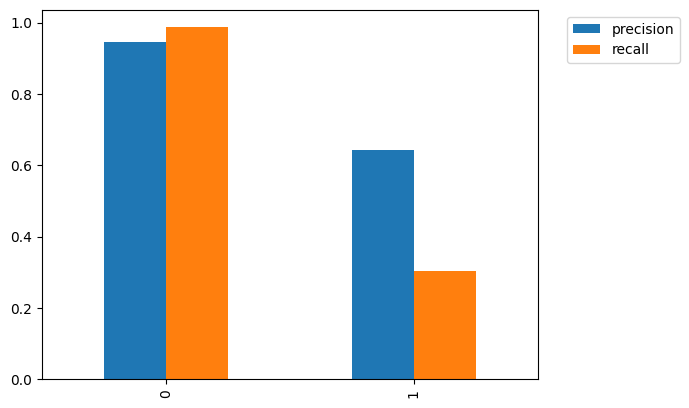

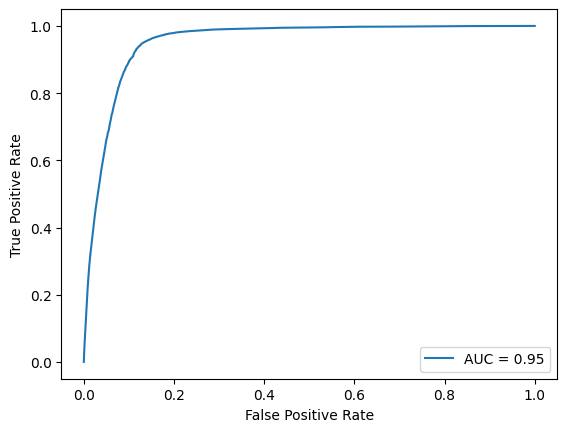

In [121]:
X_train, y_train = shuffle(X_train, y_train, random_state=2023)

y_pred, y_pred_proba = custom_ensemble_2(X_train, y_train, X_test, y_test)


#roc
plot_ROC_Curve(y_test, y_pred, y_pred_proba)


 Cluster
0     0.003227
1     0.011301
2     0.471593
3     0.000849
4     0.464646
5     0.032979
6     0.051375
7     0.499414
8     0.402475
9     0.107844
10    0.018561
11    0.075454
12    0.022375
13    0.269713
14    0.477420
15    0.308138
16    0.032993
17    0.011474
18    0.391121
19    0.077357
20    0.272464
Name: Target, dtype: float64 

                       0             1  accuracy      macro avg   weighted avg
precision       0.946053      0.648115  0.936307       0.797084       0.924190
recall          0.987578      0.288908  0.936307       0.638243       0.936307
f1-score        0.966370      0.399660  0.936307       0.683015       0.924783
support    236671.000000  18743.000000  0.936307  255414.000000  255414.000000
[[233731   2940]
 [ 13328   5415]]


,0,1,accuracy,macro avg,weighted avg
precision,0.946053,0.648115,0.936307,0.797084,0.924190
recall,0.987578,0.288908,0.936307,0.638243,0.936307
f1-score,0.966370,0.399660,0.936307,0.683015,0.924783
support,236671.000000,18743.000000,0.936307,255414.000000,255414.000000


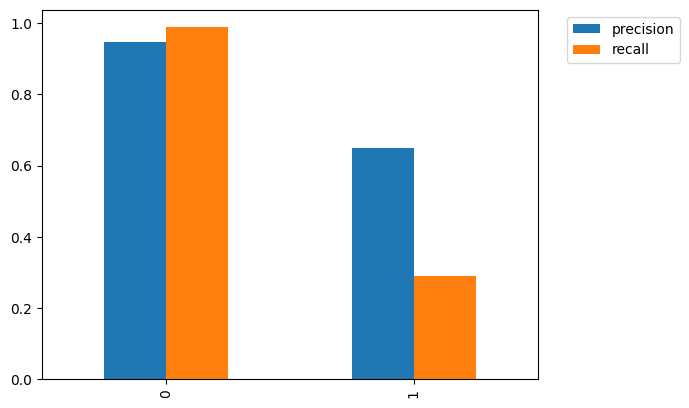

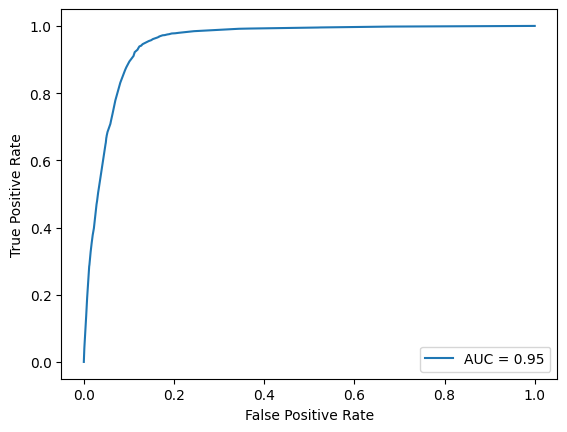

In [122]:
X_train_feature_reduced, y_train_feature_reduced = shuffle(
    X_train_feature_reduced, y_train_feature_reduced, random_state=19)

y_pred, y_pred_proba = custom_ensemble_2(
    X_train_feature_reduced, y_train_feature_reduced, X_test_feature_reduced, y_test_feature_reduced)


#roc
plot_ROC_Curve(y_test_feature_reduced, y_pred, y_pred_proba)


 Cluster
0     0.021869
1     0.057506
2     0.885159
3     0.882185
4     0.089500
5     0.890462
6     0.119699
7     0.145242
8     0.035410
9     0.811581
10    0.050471
11    0.769886
12    0.046834
13    0.383474
14    0.393574
15    0.807857
16    0.912079
17    0.791671
18    0.248482
19    0.127897
20    0.835395
Name: Target, dtype: float64 

                       0             1  accuracy      macro avg   weighted avg
precision       0.992401      0.400678  0.893373       0.696540       0.948979
recall          0.891757      0.913781  0.893373       0.902769       0.893373
f1-score        0.939391      0.557084  0.893373       0.748238       0.911336
support    236671.000000  18743.000000  0.893373  255414.000000  255414.000000
[[211053  25618]
 [  1616  17127]]


,0,1,accuracy,macro avg,weighted avg
precision,0.992401,0.400678,0.893373,0.696540,0.948979
recall,0.891757,0.913781,0.893373,0.902769,0.893373
f1-score,0.939391,0.557084,0.893373,0.748238,0.911336
support,236671.000000,18743.000000,0.893373,255414.000000,255414.000000


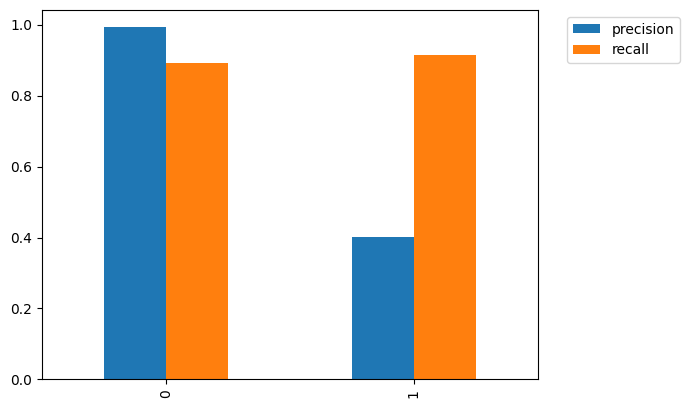

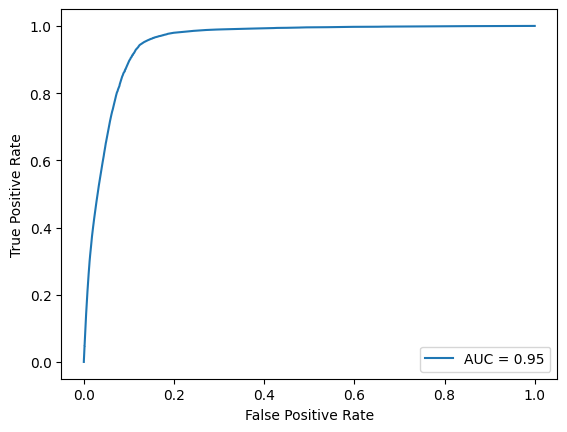

In [124]:
X_train_SMOTE, y_train_SMOTE = shuffle(
    X_train_SMOTE, y_train_SMOTE, random_state=19)

y_pred, y_pred_proba = custom_ensemble_2(X_train_SMOTE, y_train_SMOTE, X_test, y_test)

#roc
plot_ROC_Curve(y_test, y_pred, y_pred_proba)


 Cluster
0     0.398911
1     0.009581
2     0.702835
3     0.593789
4     0.069934
5     0.841976
6     0.051715
7     0.894503
8     0.807537
9     0.805856
10    0.896782
11    0.097855
12    0.810533
13    0.879615
14    0.931613
15    0.533309
16    0.093454
17    0.898872
18    0.529602
19    0.298286
20    0.902430
Name: Target, dtype: float64 

                       0             1  accuracy      macro avg   weighted avg
precision       0.991680      0.396644  0.891983       0.694162       0.948015
recall          0.890903      0.905618  0.891983       0.898261       0.891983
f1-score        0.938594      0.551668  0.891983       0.745131       0.910201
support    236671.000000  18743.000000  0.891983  255414.000000  255414.000000
[[210851  25820]
 [  1769  16974]]


,0,1,accuracy,macro avg,weighted avg
precision,0.991680,0.396644,0.891983,0.694162,0.948015
recall,0.890903,0.905618,0.891983,0.898261,0.891983
f1-score,0.938594,0.551668,0.891983,0.745131,0.910201
support,236671.000000,18743.000000,0.891983,255414.000000,255414.000000


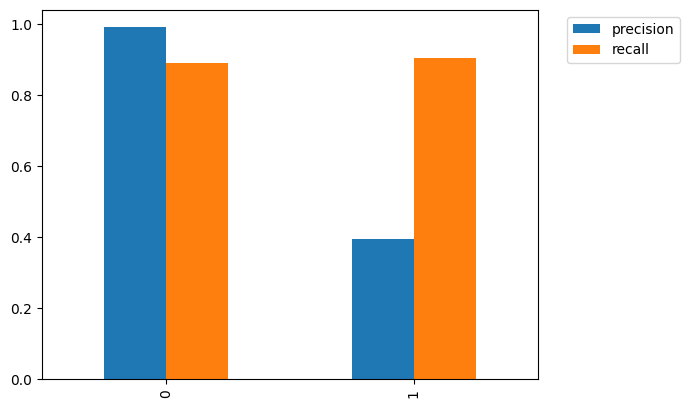

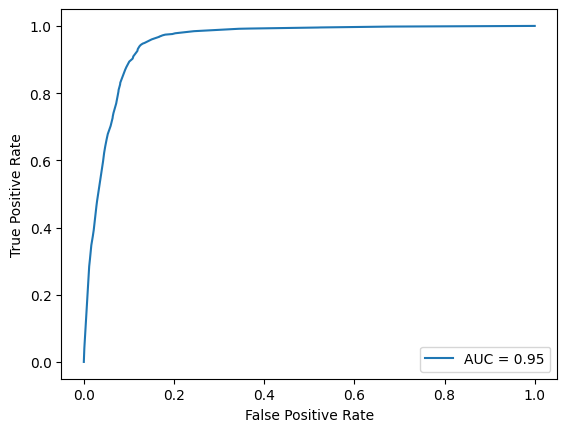

In [125]:
y_pred, y_pred_proba = custom_ensemble_2(
    X_train_feature_reduced_SMOTE, y_train_feature_reduced_SMOTE, X_test_feature_reduced, y_test_feature_reduced )

#roc
plot_ROC_Curve(y_test_feature_reduced, y_pred, y_pred_proba)

New resampling of data to check if resampling helps as it increased the precision values in above model

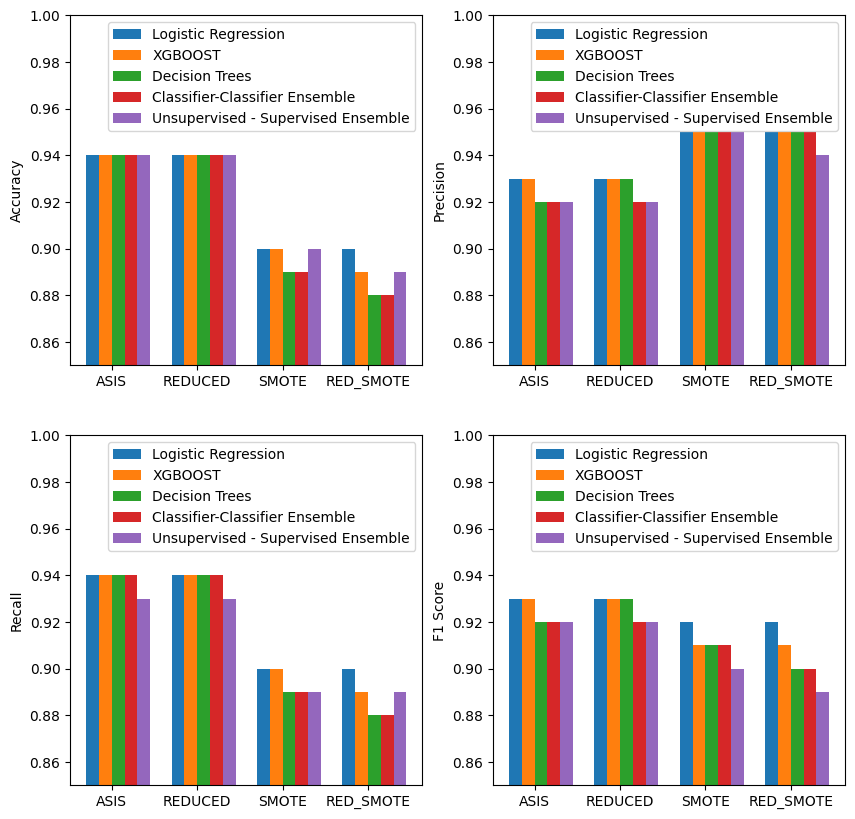

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
logistic_regression_acc = [0.94, 0.94, 0.90, 0.90]
xgboost_acc = [0.94, 0.94, 0.90, 0.89]
decision_trees_acc = [0.94, 0.94, 0.89, 0.88]
classifier_ensemble_acc = [0.94, 0.94, 0.89, 0.88]
unsupervised_supervised_ensemble_acc = [0.94, 0.94, 0.90, 0.89]

logistic_regression_prec = [0.93, 0.93, 0.95, 0.95]
xgboost_prec = [0.93, 0.93, 0.95, 0.95]
decision_trees_prec = [0.92, 0.93, 0.95, 0.95]
classifier_ensemble_prec = [0.92, 0.92, 0.95, 0.95]
unsupervised_supervised_ensemble_prec = [0.92, 0.92, 0.95, 0.94]

logistic_regression_recall = [0.94, 0.94, 0.90, 0.90]
xgboost_recall = [0.94, 0.94, 0.90, 0.89]
decision_trees_recall = [0.94, 0.94, 0.89, 0.88]
classifier_ensemble_recall = [0.94, 0.94, 0.89, 0.88]
unsupervised_supervised_ensemble_recall = [0.93, 0.93, 0.89, 0.89]

logistic_regression_f1 = [0.93, 0.93, 0.92, 0.92]
xgboost_f1 = [0.93, 0.93, 0.91, 0.91]
decision_trees_f1 = [0.92, 0.93, 0.91, 0.90]
classifier_ensemble_f1 = [0.92, 0.92, 0.91, 0.90]
unsupervised_supervised_ensemble_f1 = [0.92, 0.92, 0.90, 0.89]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Set x-axis ticks
x = np.arange(4)
labels = ['ASIS', 'REDUCED', 'SMOTE', 'RED_SMOTE']

# Set bar width
width = 0.15

# Accuracy plot
axs[0, 0].bar(x - 2 * width, logistic_regression_acc, width, label='Logistic Regression')
axs[0, 0].bar(x - width, xgboost_acc, width, label='XGBOOST')
axs[0, 0].bar(x, decision_trees_acc, width, label='Decision Trees')
axs[0, 0].bar(x + width, classifier_ensemble_acc, width, label='Classifier-Classifier Ensemble')
axs[0, 0].bar(x + 2 * width, unsupervised_supervised_ensemble_acc, width, label='Unsupervised - Supervised Ensemble')
axs[0, 0].set_xticks(x - width / 2)
axs[0, 0].set_xticklabels(labels)
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim(0.85, 1)
axs[0, 0].legend()

# Precision plot
axs[0, 1].bar(x - 2 * width, logistic_regression_prec, width, label='Logistic Regression')
axs[0, 1].bar(x - width, xgboost_prec, width, label='XGBOOST')
axs[0, 1].bar(x, decision_trees_prec, width, label='Decision Trees')
axs[0, 1].bar(x + width, classifier_ensemble_prec, width, label='Classifier-Classifier Ensemble')
axs[0, 1].bar(x + 2 * width, unsupervised_supervised_ensemble_prec, width, label='Unsupervised - Supervised Ensemble')
axs[0, 1].set_xticks(x - width / 2)
axs[0, 1].set_xticklabels(labels)
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_ylim(0.85, 1)
axs[0, 1].legend()

# Recall plot
axs[1, 0].bar(x - 2 * width, logistic_regression_recall, width, label='Logistic Regression')
axs[1, 0].bar(x - width, xgboost_recall, width, label='XGBOOST')
axs[1, 0].bar(x, decision_trees_recall, width, label='Decision Trees')
axs[1, 0].bar(x + width, classifier_ensemble_recall, width, label='Classifier-Classifier Ensemble')
axs[1, 0].bar(x + 2 * width, unsupervised_supervised_ensemble_recall, width, label='Unsupervised - Supervised Ensemble')
axs[1, 0].set_xticks(x - width / 2)
axs[1, 0].set_xticklabels(labels)
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_ylim(0.85, 1)
axs[1, 0].legend()

# F1 score plot
axs[1, 1].bar(x - 2 * width, logistic_regression_f1, width, label='Logistic Regression')
axs[1, 1].bar(x - width, xgboost_f1, width, label='XGBOOST')
axs[1, 1].bar(x, decision_trees_f1, width, label='Decision Trees')
axs[1, 1].bar(x + width, classifier_ensemble_f1, width, label='Classifier-Classifier Ensemble')
axs[1, 1].bar(x + 2 * width, unsupervised_supervised_ensemble_f1, width, label='Unsupervised - Supervised Ensemble')
axs[1, 1].set_xticks(x - width / 2)
axs[1, 1].set_xticklabels(labels)
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_ylim(0.85, 1)
axs[1, 1].legend()


*****************METRICS FOR POSITIVE SAMPLES*************************


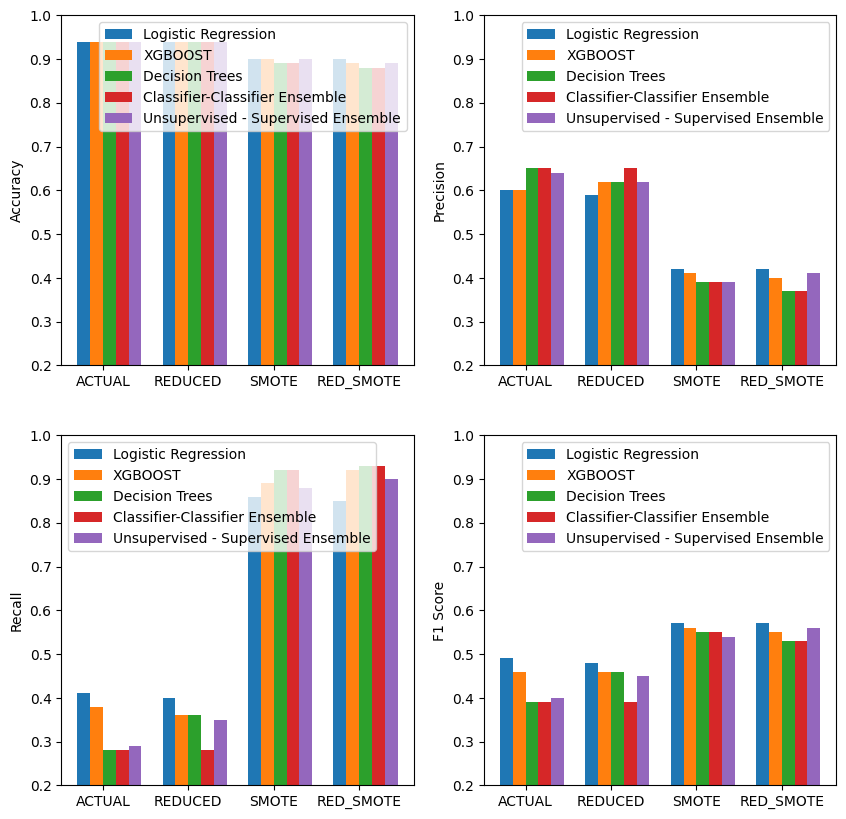

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
logistic_regression_acc = [0.94, 0.94, 0.90, 0.90]
xgboost_acc = [0.94, 0.94, 0.90, 0.89]
decision_trees_acc = [0.94, 0.94, 0.89, 0.88]
classifier_ensemble_acc = [0.94, 0.94, 0.89, 0.88]
unsupervised_supervised_ensemble_acc = [0.94, 0.94, 0.90, 0.89]

logistic_regression_prec = [0.60, 0.59, 0.42, 0.42]
xgboost_prec = [0.60, 0.62, 0.41, 0.40]
decision_trees_prec = [0.65, 0.62, 0.39, 0.37]
classifier_ensemble_prec = [0.65, 0.65, 0.39, 0.37]
unsupervised_supervised_ensemble_prec = [0.64, 0.62, 0.39, 0.41]

logistic_regression_recall = [0.41, 0.40, 0.86, 0.85]
xgboost_recall = [0.38, 0.36, 0.89, 0.92]
decision_trees_recall = [0.28, 0.36, 0.92, 0.93]
classifier_ensemble_recall = [0.28, 0.28, 0.92, 0.93]
unsupervised_supervised_ensemble_recall = [0.29, 0.35, 0.88, 0.90]

logistic_regression_f1 = [0.49, 0.48, 0.57, 0.57]
xgboost_f1 = [0.46, 0.46, 0.56, 0.55]
decision_trees_f1 = [0.39, 0.46, 0.55, 0.53]
classifier_ensemble_f1 = [0.39, 0.39, 0.55, 0.53]
unsupervised_supervised_ensemble_f1 = [0.40, 0.45, 0.54, 0.56]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Set x-axis ticks
x = np.arange(4)
labels = ['ACTUAL', 'REDUCED', 'SMOTE', 'RED_SMOTE']

# Set bar width
width = 0.15
print("*****************METRICS FOR POSITIVE SAMPLES*************************")
# Accuracy plot
axs[0, 0].bar(x - 2 * width, logistic_regression_acc, width, label='Logistic Regression')
axs[0, 0].bar(x - width, xgboost_acc, width, label='XGBOOST')
axs[0, 0].bar(x, decision_trees_acc, width, label='Decision Trees')
axs[0, 0].bar(x + width, classifier_ensemble_acc, width, label='Classifier-Classifier Ensemble')
axs[0, 0].bar(x + 2 * width, unsupervised_supervised_ensemble_acc, width, label='Unsupervised - Supervised Ensemble')
axs[0, 0].set_xticks(x - width / 2)
axs[0, 0].set_xticklabels(labels)
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim(0.2, 1)
axs[0, 0].legend()

# Precision plot
axs[0, 1].bar(x - 2 * width, logistic_regression_prec, width, label='Logistic Regression')
axs[0, 1].bar(x - width, xgboost_prec, width, label='XGBOOST')
axs[0, 1].bar(x, decision_trees_prec, width, label='Decision Trees')
axs[0, 1].bar(x + width, classifier_ensemble_prec, width, label='Classifier-Classifier Ensemble')
axs[0, 1].bar(x + 2 * width, unsupervised_supervised_ensemble_prec, width, label='Unsupervised - Supervised Ensemble')
axs[0, 1].set_xticks(x - width / 2)
axs[0, 1].set_xticklabels(labels)
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_ylim(0.2, 1)
axs[0, 1].legend()

# Recall plot
axs[1, 0].bar(x - 2 * width, logistic_regression_recall, width, label='Logistic Regression')
axs[1, 0].bar(x - width, xgboost_recall, width, label='XGBOOST')
axs[1, 0].bar(x, decision_trees_recall, width, label='Decision Trees')
axs[1, 0].bar(x + width, classifier_ensemble_recall, width, label='Classifier-Classifier Ensemble')
axs[1, 0].bar(x + 2 * width, unsupervised_supervised_ensemble_recall, width, label='Unsupervised - Supervised Ensemble')
axs[1, 0].set_xticks(x - width / 2)
axs[1, 0].set_xticklabels(labels)
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_ylim(0.2, 1)
axs[1, 0].legend()

# F1 score plot
axs[1, 1].bar(x - 2 * width, logistic_regression_f1, width, label='Logistic Regression')
axs[1, 1].bar(x - width, xgboost_f1, width, label='XGBOOST')
axs[1, 1].bar(x, decision_trees_f1, width, label='Decision Trees')
axs[1, 1].bar(x + width, classifier_ensemble_f1, width, label='Classifier-Classifier Ensemble')
axs[1, 1].bar(x + 2 * width, unsupervised_supervised_ensemble_f1, width, label='Unsupervised - Supervised Ensemble')
axs[1, 1].set_xticks(x - width / 2)
axs[1, 1].set_xticklabels(labels)
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_ylim(0.2, 1)
axs[1, 1].legend()
plt.show()